In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Pred - Prey Model Functions - Version 3

In [9]:
def dNdt(H, P, parameters_dict):
    #Unpacking herbivore parameters:
    r_H = parameters_dict['r_H'] # growth rate of herbivores
    K_H = parameters_dict['K_H'] # carrying capacity of herbivores
    theta_H = parameters_dict['theta_H'] # immigration of herbivores
    c = parameters_dict['c'] # attack rate by the predator
    d = parameters_dict['d'] # value of H when predation half its max value
    q_H = parameters_dict['q_H'] # proportionality constant for herbivore harvest
    E_H = parameters_dict['E_H'] # Effort for herbivore harvest
    #Unpacking predator parameters:
    r_P = parameters_dict['r_P'] # growth rate of predator 
    K_P = parameters_dict['K_P'] # carrying capactiy of predators 
    b = parameters_dict['b'] #
    theta_P = parameters_dict['theta_P'] # immigration of predators  
    q_P = parameters_dict['q_P'] # proportionality constant for predators harvest
    E_P = parameters_dict['E_P'] # Effort for predator harvest
    
    #Calculate the derivative 
    dH = r_H*H*(1-H/K_H) - (c*H*P)/(d+H) + theta_H - q_H*E_H*H
    dP = r_P*P*(1-P/K_P) + (b*H*P)/(d+H) + theta_P - q_P*E_P*P
    
    return dH, dP

In [10]:
# Function: numerical solver, 2nd order RK 

def RK2(H, P, parameters_dict):
    H_init = H
    P_init = P 
    
    dH1, dP1 = dNdt(H,P,parameters_dict)
    
    H1 = H + 0.5*dH1
    P1 = P + 0.5*dP1
    
    dH2, dP2 = dNdt(H1,P1,parameters_dict)
    
    dH_ave = (dH1+dH2)/2 
    dP_ave = (dP1+dP2)/2 
    
    H = H_init + dH_ave
    P = P_init + dP_ave
    
    #Calculate harvest 
    q_H = parameters_dict['q_H'] #proportionality constant for herbivore harvest 
    E_H = parameters_dict['E_H'] #Effort for herbivore harvest
    
    q_P = parameters_dict['q_P'] #proportionality constant for herbivore harvest 
    E_P = parameters_dict['E_P'] #Effort for herbivore harvest
    
    herbivore_harvest = q_H*E_H*H
    predator_harvest = q_P*E_P*P
    
    return H, P, herbivore_harvest, predator_harvest

In [11]:
# Function to run the model 

def run_model(INIT_H, INIT_P, parameters_dict):
    
    numyears = parameters_dict['numyears']
    
    H_array = np.zeros(numyears+1)
    P_array = np.zeros(numyears+1)
    H_harvest_array = np.zeros(numyears+1)
    P_harvest_array = np.zeros(numyears+1)
    
    H_array[0] = INIT_H #Starting biomass of herbivore
    P_array[0] = INIT_P #Starting biomass of predator 
    H_harvest_array[0] = 0
    P_harvest_array[0] = 0
    
    for i in np.arange(0,numyears):
        H_array[i+1], P_array[i+1], H_harvest_array[i+1], P_harvest_array[i+1] \
            = RK2(H_array[i], P_array[i], parameters_dict)
        i = i+1
    
    return H_array, P_array, H_harvest_array, P_harvest_array

# Baseline Conditions
### Plot 1

In [12]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }


In [13]:
H0 = 1000
P0 = 100

H_array1, P_array1, H_harvest_array1, P_harvest_array1 = run_model(H0, P0, parameters_dict)

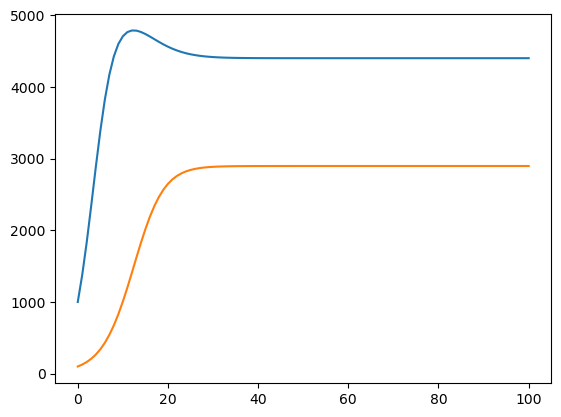

In [14]:
plt.plot(H_array1)
plt.plot(P_array1)
plt.rcParams.update(plt.rcParamsDefault)

### Plot 2

In [15]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }


In [16]:
H0 = 1000
P0 = 100

H_array2, P_array2, H_harvest_array2, P_harvest_array2 = run_model(H0, P0, parameters_dict)

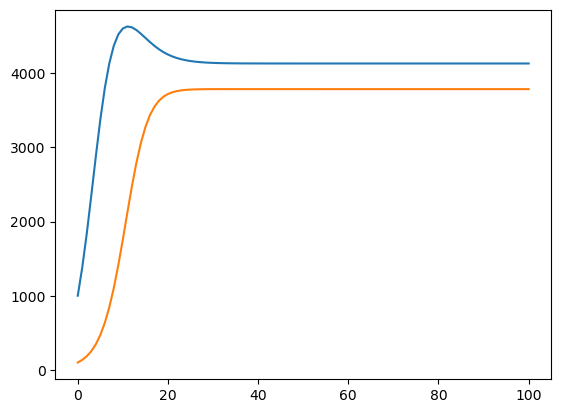

In [17]:
plt.plot(H_array2)
plt.plot(P_array2)
plt.rcParams.update(plt.rcParamsDefault)

### Plot 3

In [18]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }


In [19]:
H0 = 1000
P0 = 100

H_array3, P_array3, H_harvest_array3, P_harvest_array3 = run_model(H0, P0, parameters_dict)

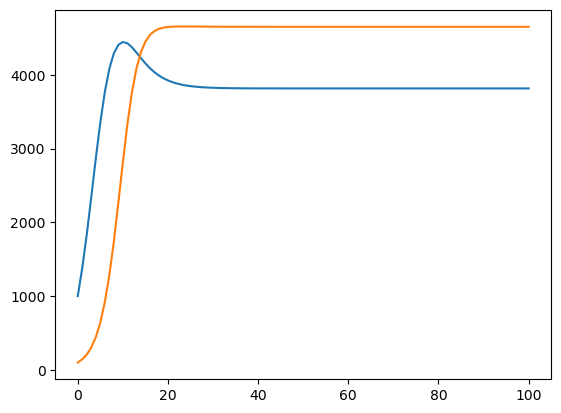

In [20]:
plt.plot(H_array3)
plt.plot(P_array3)
plt.rcParams.update(plt.rcParamsDefault)

### Plot 4

In [21]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }


In [22]:
H0 = 1000
P0 = 100

H_array4, P_array4, H_harvest_array4, P_harvest_array4 = run_model(H0, P0, parameters_dict)

### Plot 5

In [23]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [24]:
H0 = 1000
P0 = 100

H_array5, P_array5, H_harvest_array5, P_harvest_array5 = run_model(H0, P0, parameters_dict)

### Plot 6

In [25]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [26]:
H0 = 1000
P0 = 100

H_array6, P_array6, H_harvest_array6, P_harvest_array6 = run_model(H0, P0, parameters_dict)

### Plot 7 

In [27]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [28]:
H0 = 1000
P0 = 100

H_array7, P_array7, H_harvest_array7, P_harvest_array7 = run_model(H0, P0, parameters_dict)

### Plot 8 

In [29]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [30]:
H0 = 1000
P0 = 100

H_array8, P_array8, H_harvest_array8, P_harvest_array8 = run_model(H0, P0, parameters_dict)

### Plot 9 

In [31]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [32]:
H0 = 1000
P0 = 100

H_array9, P_array9, H_harvest_array9, P_harvest_array9 = run_model(H0, P0, parameters_dict)

# 3 x 3 Plot - Time Series

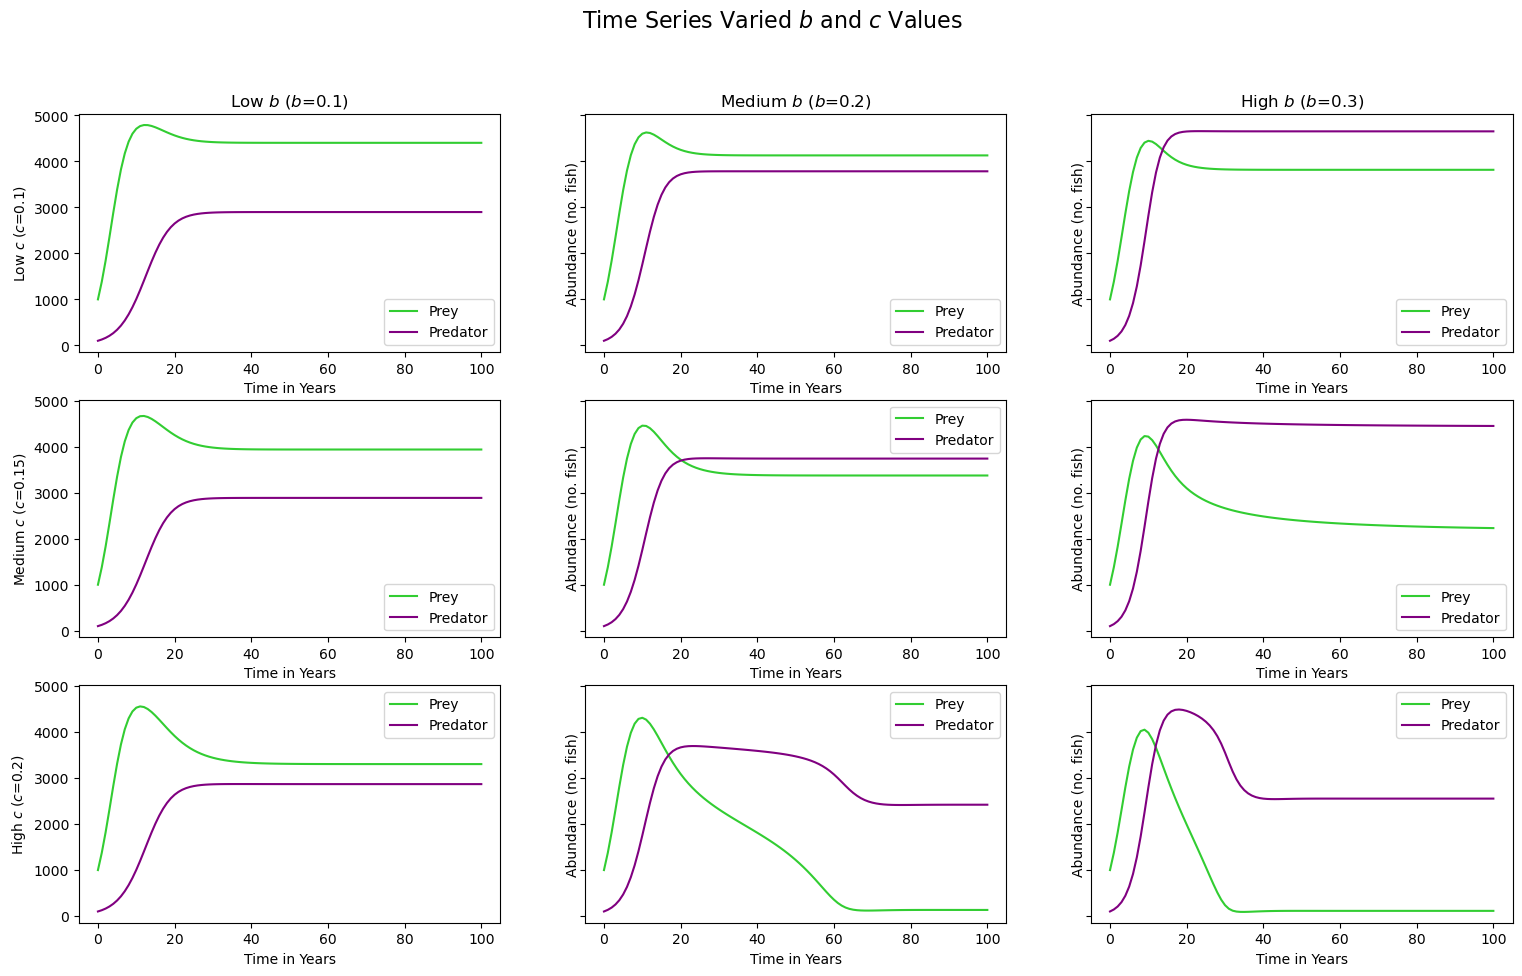

In [33]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharey= True)
plt.rcParams.update(plt.rcParamsDefault)

ax1.plot(H_array1, color="limegreen")
ax1.plot(P_array1, color="purple")
ax1.set_xlabel("Time in Years")
ax1.set_title("Low $b$ ($b$=0.1)")
ax1.set_ylabel("Low $c$ ($c$=0.1)")
ax1.legend(['Prey','Predator'])

ax2.plot(H_array2, color="limegreen")
ax2.plot(P_array2, color="purple")
ax2.set_xlabel("Time in Years")
ax2.set_ylabel("Abundance (no. fish)")
ax2.set_title("Medium $b$ ($b$=0.2)")
ax2.legend(['Prey','Predator'])

ax3.plot(H_array3, color="limegreen")
ax3.plot(P_array3, color="purple")
ax3.set_xlabel("Time in Years")
ax3.set_ylabel("Abundance (no. fish)")
ax3.set_title("High $b$ ($b$=0.3)")
ax3.legend(['Prey','Predator'])

ax4.plot(H_array4, color="limegreen")
ax4.plot(P_array4, color="purple")
ax4.set_xlabel("Time in Years")
ax4.set_ylabel("Medium $c$ ($c$=0.15)")
ax4.legend(['Prey','Predator'])

ax5.plot(H_array5, color="limegreen")
ax5.plot(P_array5, color="purple")
ax5.set_xlabel("Time in Years")
ax5.set_ylabel("Abundance (no. fish)")
ax5.legend(['Prey','Predator'])

ax6.plot(H_array6, color="limegreen")
ax6.plot(P_array6, color="purple")
ax6.set_xlabel("Time in Years")
ax6.set_ylabel("Abundance (no. fish)")
ax6.legend(['Prey','Predator'])

ax7.plot(H_array7, color="limegreen")
ax7.plot(P_array7, color="purple")
ax7.set_xlabel("Time in Years")
ax7.set_ylabel("High $c$ ($c$=0.2)")
ax7.legend(['Prey','Predator'])

ax8.plot(H_array8, color="limegreen")
ax8.plot(P_array8, color="purple")
ax8.set_xlabel("Time in Years")
ax8.set_ylabel("Abundance (no. fish)")
ax8.legend(['Prey','Predator'])

ax9.plot(H_array9, color="limegreen")
ax9.plot(P_array9, color="purple")
ax9.set_xlabel("Time in Years")
ax9.set_ylabel("Abundance (no. fish)")
ax9.legend(['Prey','Predator'])

fig.suptitle('Time Series Varied $b$ and $c$ Values', fontsize=16)
fig.set_size_inches(18.5, 10.5)
plt.savefig("ICRS_figures/Baseline_3x3_abundance.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

# Plot 10 

In [343]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.3 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [344]:
H0 = 1000
P0 = 100

H_array10, P_array10, H_harvest_array10, P_harvest_array10 = run_model(H0, P0, parameters_dict)

# Plot 11

In [345]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.3 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [346]:
H0 = 1000
P0 = 100

H_array11, P_array11, H_harvest_array11, P_harvest_array11 = run_model(H0, P0, parameters_dict)

# Plot 12

In [347]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.3 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [348]:
H0 = 1000
P0 = 100

H_array12, P_array12, H_harvest_array12, P_harvest_array12 = run_model(H0, P0, parameters_dict)

# Plot 13

In [349]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.4 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [350]:
H0 = 1000
P0 = 100

H_array13, P_array13, H_harvest_array13, P_harvest_array13 = run_model(H0, P0, parameters_dict)

# Plot 14

In [351]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.4 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [352]:
H0 = 1000
P0 = 100

H_array14, P_array14, H_harvest_array14, P_harvest_array14 = run_model(H0, P0, parameters_dict)

# Plot 15

In [353]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.4 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [354]:
H0 = 1000
P0 = 100

H_array15, P_array15, H_harvest_array15, P_harvest_array15 = run_model(H0, P0, parameters_dict)

# Plot 16

In [355]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.3 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.4 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [356]:
H0 = 1000
P0 = 100

H_array16, P_array16, H_harvest_array16, P_harvest_array16 = run_model(H0, P0, parameters_dict)

# Extended Plots

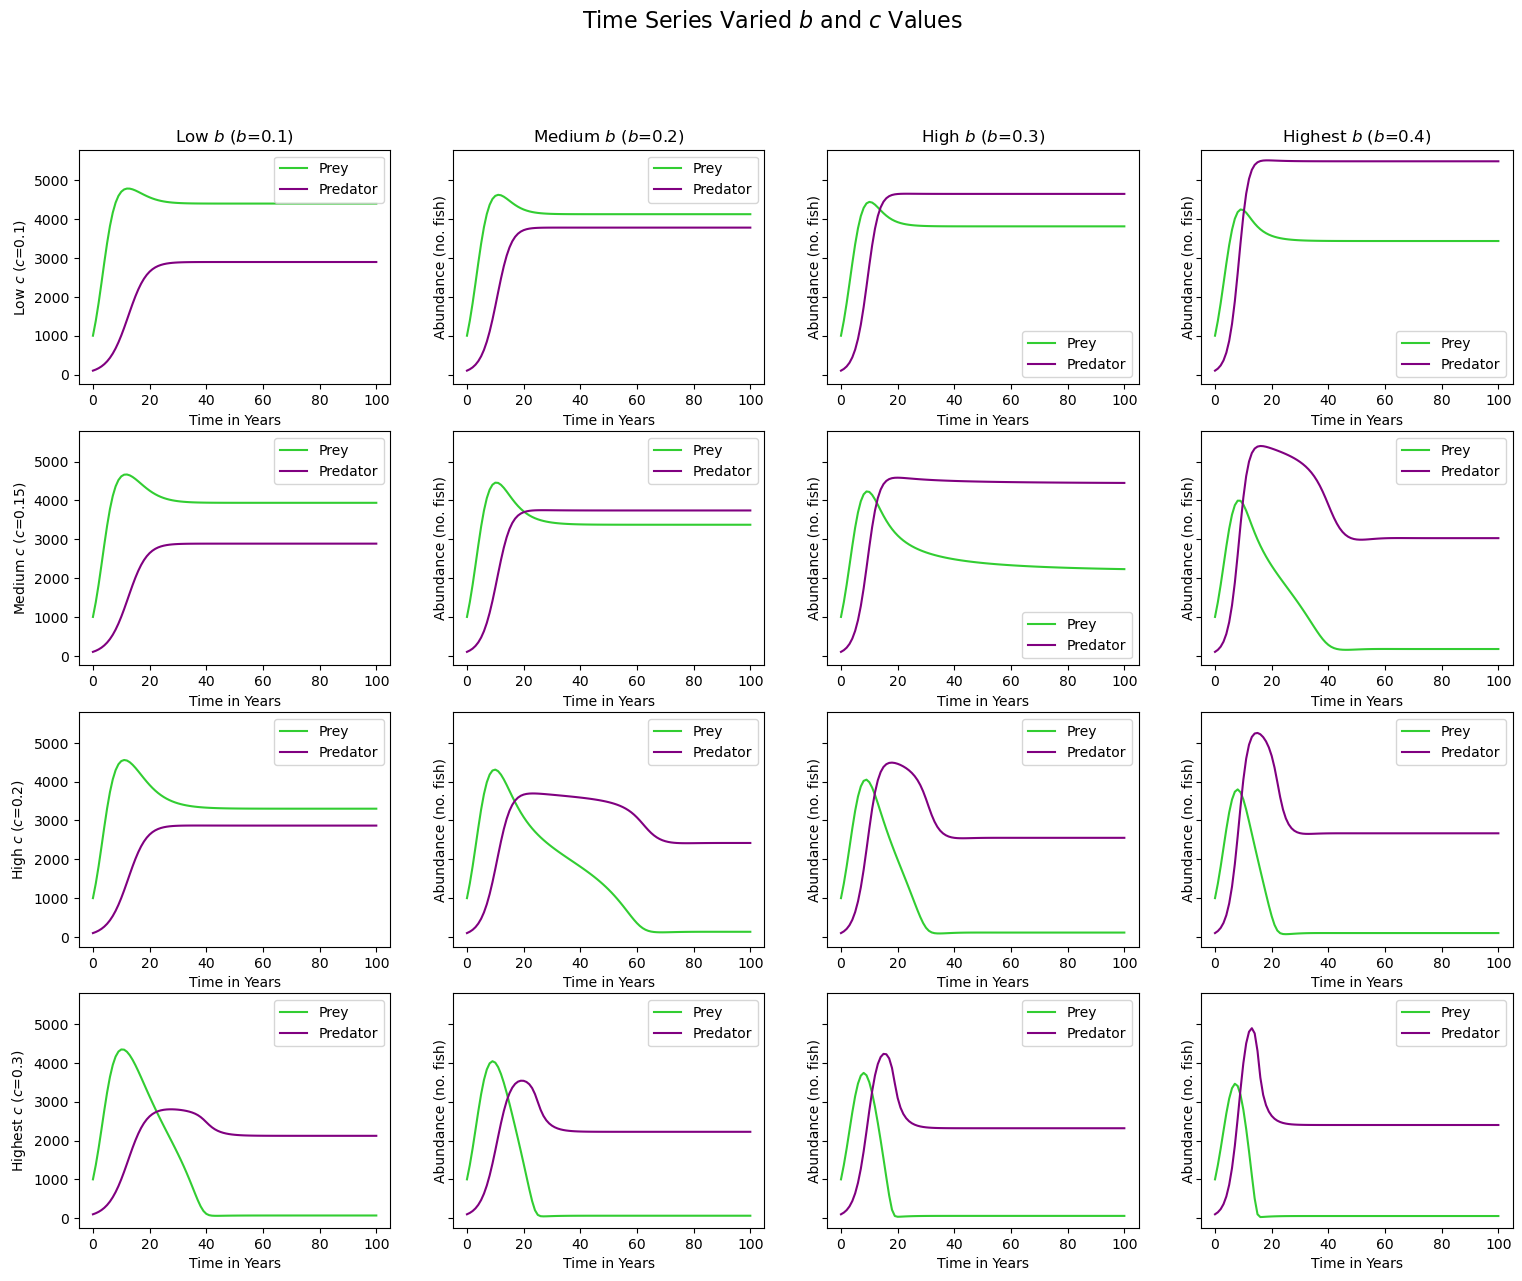

In [357]:
fig, ((ax1, ax2, ax3, ax13), (ax4, ax5, ax6, ax14), (ax7, ax8, ax9, ax15), (ax10, ax11, ax12, ax16)) = plt.subplots(4, 4, sharey= True)
plt.rcParams.update(plt.rcParamsDefault)

ax1.plot(H_array1, color="limegreen")
ax1.plot(P_array1, color="purple")
ax1.set_xlabel("Time in Years")
ax1.set_title("Low $b$ ($b$=0.1)")
ax1.set_ylabel("Low $c$ ($c$=0.1)")
ax1.legend(['Prey','Predator'])

ax2.plot(H_array2, color="limegreen")
ax2.plot(P_array2, color="purple")
ax2.set_xlabel("Time in Years")
ax2.set_ylabel("Abundance (no. fish)")
ax2.set_title("Medium $b$ ($b$=0.2)")
ax2.legend(['Prey','Predator'])

ax3.plot(H_array3, color="limegreen")
ax3.plot(P_array3, color="purple")
ax3.set_xlabel("Time in Years")
ax3.set_ylabel("Abundance (no. fish)")
ax3.set_title("High $b$ ($b$=0.3)")
ax3.legend(['Prey','Predator'])

ax4.plot(H_array4, color="limegreen")
ax4.plot(P_array4, color="purple")
ax4.set_xlabel("Time in Years")
ax4.set_ylabel("Medium $c$ ($c$=0.15)")
ax4.legend(['Prey','Predator'])

ax5.plot(H_array5, color="limegreen")
ax5.plot(P_array5, color="purple")
ax5.set_xlabel("Time in Years")
ax5.set_ylabel("Abundance (no. fish)")
ax5.legend(['Prey','Predator'])

ax6.plot(H_array6, color="limegreen")
ax6.plot(P_array6, color="purple")
ax6.set_xlabel("Time in Years")
ax6.set_ylabel("Abundance (no. fish)")
ax6.legend(['Prey','Predator'])

ax7.plot(H_array7, color="limegreen")
ax7.plot(P_array7, color="purple")
ax7.set_xlabel("Time in Years")
ax7.set_ylabel("High $c$ ($c$=0.2)")
ax7.legend(['Prey','Predator'])

ax8.plot(H_array8, color="limegreen")
ax8.plot(P_array8, color="purple")
ax8.set_xlabel("Time in Years")
ax8.set_ylabel("Abundance (no. fish)")
ax8.legend(['Prey','Predator'])

ax9.plot(H_array9, color="limegreen")
ax9.plot(P_array9, color="purple")
ax9.set_xlabel("Time in Years")
ax9.set_ylabel("Abundance (no. fish)")
ax9.legend(['Prey','Predator'])

ax10.plot(H_array10, color="limegreen")
ax10.plot(P_array10, color="purple")
ax10.set_xlabel("Time in Years")
ax10.set_ylabel("Highest $c$ ($c$=0.3)")
ax10.legend(['Prey','Predator'])

ax11.plot(H_array11, color="limegreen")
ax11.plot(P_array11, color="purple")
ax11.set_xlabel("Time in Years")
ax11.set_ylabel("Abundance (no. fish)")
ax11.legend(['Prey','Predator'])

ax12.plot(H_array12, color="limegreen")
ax12.plot(P_array12, color="purple")
ax12.set_xlabel("Time in Years")
ax12.set_ylabel("Abundance (no. fish)")
ax12.legend(['Prey','Predator'])

ax13.plot(H_array13, color="limegreen")
ax13.plot(P_array13, color="purple")
ax13.set_xlabel("Time in Years")
ax13.set_ylabel("Abundance (no. fish)")
ax13.set_title("Highest $b$ ($b$=0.4)")
ax13.legend(['Prey','Predator'])

ax14.plot(H_array14, color="limegreen")
ax14.plot(P_array14, color="purple")
ax14.set_xlabel("Time in Years")
ax14.set_ylabel("Abundance (no. fish)")
ax14.legend(['Prey','Predator'])

ax15.plot(H_array15, color="limegreen")
ax15.plot(P_array15, color="purple")
ax15.set_xlabel("Time in Years")
ax15.set_ylabel("Abundance (no. fish)")
ax15.legend(['Prey','Predator'])

ax16.plot(H_array16, color="limegreen")
ax16.plot(P_array16, color="purple")
ax16.set_xlabel("Time in Years")
ax16.set_ylabel("Abundance (no. fish)")
ax16.legend(['Prey','Predator'])

fig.suptitle('Time Series Varied $b$ and $c$ Values', fontsize=16)
fig.set_size_inches(18.5, 14)
#plt.savefig("ICRS_figures/Baseline_3x3_abundance.jpg",
            #format='jpeg',
            #dpi=300,
            #bbox_inches='tight')

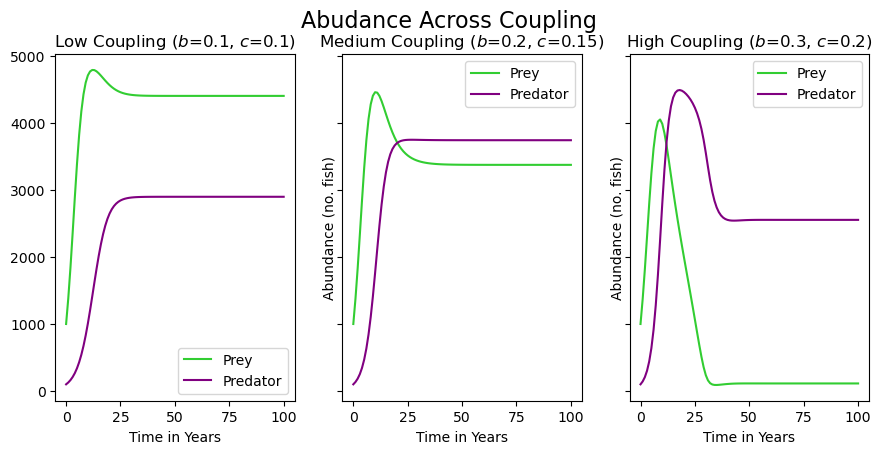

In [56]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey= True)
plt.rcParams.update(plt.rcParamsDefault)

ax1.plot(H_array1, color="limegreen")
ax1.plot(P_array1, color="purple")
ax1.set_xlabel("Time in Years")
ax1.set_title("Low Coupling ($b$=0.1, $c$=0.1)")
ax1.legend(['Prey','Predator'])

ax2.plot(H_array5, color="limegreen")
ax2.plot(P_array5, color="purple")
ax2.set_xlabel("Time in Years")
ax2.set_ylabel("Abundance (no. fish)")
ax2.set_title("Medium Coupling ($b$=0.2, $c$=0.15)")
ax2.legend(['Prey','Predator'])

ax3.plot(H_array9, color="limegreen")
ax3.plot(P_array9, color="purple")
ax3.set_xlabel("Time in Years")
ax3.set_ylabel("Abundance (no. fish)")
ax3.set_title("High Coupling ($b$=0.3, $c$=0.2)")
ax3.legend(['Prey','Predator'])

fig.suptitle('Abudance Across Coupling', fontsize=16)
fig.set_size_inches(10.5, 4.5)
#plt.savefig("ICRS_figures/Baseline_3x3_abundance.jpg",
            #format='jpeg',
            #dpi=300,
            #bbox_inches='tight')

# Increasing Fishing Pressure 

### Plot 1 

In [89]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array1, P_array1, H_harvest_array1, P_harvest_array1 = run_model(H0, P0, parameters_dict)

In [90]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array1 = np.zeros(size)
P_final_array1 = np.zeros(size)
H_harvest_final_array1 = np.zeros(size)
P_harvest_final_array1 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array1, P_array1, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array1[i] = np.mean(H_array1[-50:-1])
    P_final_array1[i] = np.mean(P_array1[-50:-1])
    H_harvest_final_array1[i] = np.mean(H_harvest_array[-50:-1])
    P_harvest_final_array1[i] = np.mean(P_harvest_array[-50:-1])

### Plot 2 

In [91]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array2, P_array2, H_harvest_array2, P_harvest_array2 = run_model(H0, P0, parameters_dict)

In [92]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array2 = np.zeros(size)
P_final_array2 = np.zeros(size)
H_harvest_final_array2 = np.zeros(size)
P_harvest_final_array2 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array2, P_array2, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array2[i] = np.mean(H_array2[-50:-1])
    P_final_array2[i] = np.mean(P_array2[-50:-1])
    H_harvest_final_array2[i] = np.mean(H_harvest_array[-50:-1])
    P_harvest_final_array2[i] = np.mean(P_harvest_array[-50:-1])

### Plot 3 

In [93]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array3, P_array3, H_harvest_array3, P_harvest_array3 = run_model(H0, P0, parameters_dict)

In [94]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array3 = np.zeros(size)
P_final_array3 = np.zeros(size)
H_harvest_final_array3 = np.zeros(size)
P_harvest_final_array3 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array3, P_array3, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array3[i] = np.mean(H_array3[-50:-1])
    P_final_array3[i] = np.mean(P_array3[-50:-1])
    H_harvest_final_array3[i] = np.mean(H_harvest_array3[-50:-1])
    P_harvest_final_array3[i] = np.mean(P_harvest_array3[-50:-1])

### Plot 4 

In [95]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array4, P_array4, H_harvest_array4, P_harvest_array4 = run_model(H0, P0, parameters_dict)

In [96]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array4 = np.zeros(size)
P_final_array4 = np.zeros(size)
H_harvest_final_array4 = np.zeros(size)
P_harvest_final_array4 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array4, P_array4, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array4[i] = np.mean(H_array4[-50:-1])
    P_final_array4[i] = np.mean(P_array4[-50:-1])
    H_harvest_final_array4[i] = np.mean(H_harvest_array[-50:-1])
    P_harvest_final_array4[i] = np.mean(P_harvest_array[-50:-1])

### Plot 5 

In [97]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array5, P_array5, H_harvest_array5, P_harvest_array5 = run_model(H0, P0, parameters_dict)

In [98]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array5 = np.zeros(size)
P_final_array5 = np.zeros(size)
H_harvest_final_array5 = np.zeros(size)
P_harvest_final_array5 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array5, P_array5, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array5[i] = np.mean(H_array5[-50:-1])
    P_final_array5[i] = np.mean(P_array5[-50:-1])
    H_harvest_final_array5[i] = np.mean(H_harvest_array[-50:-1])
    P_harvest_final_array5[i] = np.mean(P_harvest_array[-50:-1])

### Plot 6 

In [99]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array6, P_array6, H_harvest_array6, P_harvest_array6 = run_model(H0, P0, parameters_dict)

In [100]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array6 = np.zeros(size)
P_final_array6 = np.zeros(size)
H_harvest_final_array6 = np.zeros(size)
P_harvest_final_array6 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array6, P_array6, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array6[i] = np.mean(H_array6[-50:-1])
    P_final_array6[i] = np.mean(P_array6[-50:-1])
    H_harvest_final_array6[i] = np.mean(H_harvest_array[-50:-1])
    P_harvest_final_array6[i] = np.mean(P_harvest_array[-50:-1])

### Plot 7 

In [101]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array7, P_array7, H_harvest_array7, P_harvest_array7 = run_model(H0, P0, parameters_dict)

In [102]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array7 = np.zeros(size)
P_final_array7 = np.zeros(size)
H_harvest_final_array7 = np.zeros(size)
P_harvest_final_array7 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array7, P_array7, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array7[i] = np.mean(H_array7[-50:-1])
    P_final_array7[i] = np.mean(P_array7[-50:-1])
    H_harvest_final_array7[i] = np.mean(H_harvest_array[-50:-1])
    P_harvest_final_array7[i] = np.mean(P_harvest_array[-50:-1])

### Plot 8 

In [103]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array8, P_array8, H_harvest_array8, P_harvest_array8 = run_model(H0, P0, parameters_dict)

In [104]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array8 = np.zeros(size)
P_final_array8 = np.zeros(size)
H_harvest_final_array8 = np.zeros(size)
P_harvest_final_array8 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array8, P_array8, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array8[i] = np.mean(H_array8[-50:-1])
    P_final_array8[i] = np.mean(P_array8[-50:-1])
    H_harvest_final_array8[i] = np.mean(H_harvest_array[-50:-1])
    P_harvest_final_array8[i] = np.mean(P_harvest_array[-50:-1])

In [105]:
H_final_array8

array([ 264.6173986 ,  347.16829946,  458.34298647,  606.91203727,
        807.33238427, 1086.19915249, 1480.43733751, 1835.35132516,
       2057.39226629, 2212.74510713, 2333.12927233, 2432.46478922,
       2517.81574888, 2593.20699143, 2661.13602759, 2723.25541809,
       2780.71438014, 2834.34430031, 2884.76624151, 2932.45662579,
       2977.78915907, 3021.06259386, 3062.51969894, 3102.36057575,
       3140.7522283 , 3177.83558419, 3213.7307403 , 3248.54094651,
       3282.35567534, 3315.25301869, 3347.30158147, 3378.56199417,
       3409.08813309, 3438.92811363, 3468.12510587, 3496.7180092 ,
       3524.74201459, 3552.22907628, 3579.20830999, 3605.706331  ,
       3631.74754289, 3657.35438529, 3682.5475476 , 3707.34615413,
       3731.76792525, 3755.82931825, 3779.5456509 , 3802.9312103 ,
       3825.9993492 , 3848.76257143, 3871.23260797, 3893.42048507,
       3915.33658526, 3936.99070234, 3958.39209107, 3979.54951229,
       4000.47127396, 4021.16526877, 4041.63900862, 4061.89965

### Plot 9 

In [106]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }


H0 = 1000
P0 = 100

H_array9, P_array9, H_harvest_array9, P_harvest_array9 = run_model(H0, P0, parameters_dict)

In [107]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array9 = np.zeros(size)
P_final_array9 = np.zeros(size)
H_harvest_final_array9 = np.zeros(size)
P_harvest_final_array9 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array9, P_array9, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array9[i] = np.mean(H_array9[-50:-1])
    P_final_array9[i] = np.mean(P_array9[-50:-1])
    H_harvest_final_array9[i] = np.mean(H_harvest_array[-50:-1])
    P_harvest_final_array9[i] = np.mean(P_harvest_array[-50:-1])

## Function to Split Axes

In [108]:
def two_scales(ax1, E_P_array, data1, data2, c1, c2, m1, m2):
    ax2 = ax1.twinx()
    ax1.plot(E_P_array, data1, color=c1, marker=m1)
    ax1.set_xlabel('Predator Harvesting Effort')
    ax1.set_ylabel('Prey Abundance')
    ax2.plot(E_P_array, data2, color=c2, marker=m2)
    ax2.set_ylabel('Predator Abundance')
    return ax1, ax2

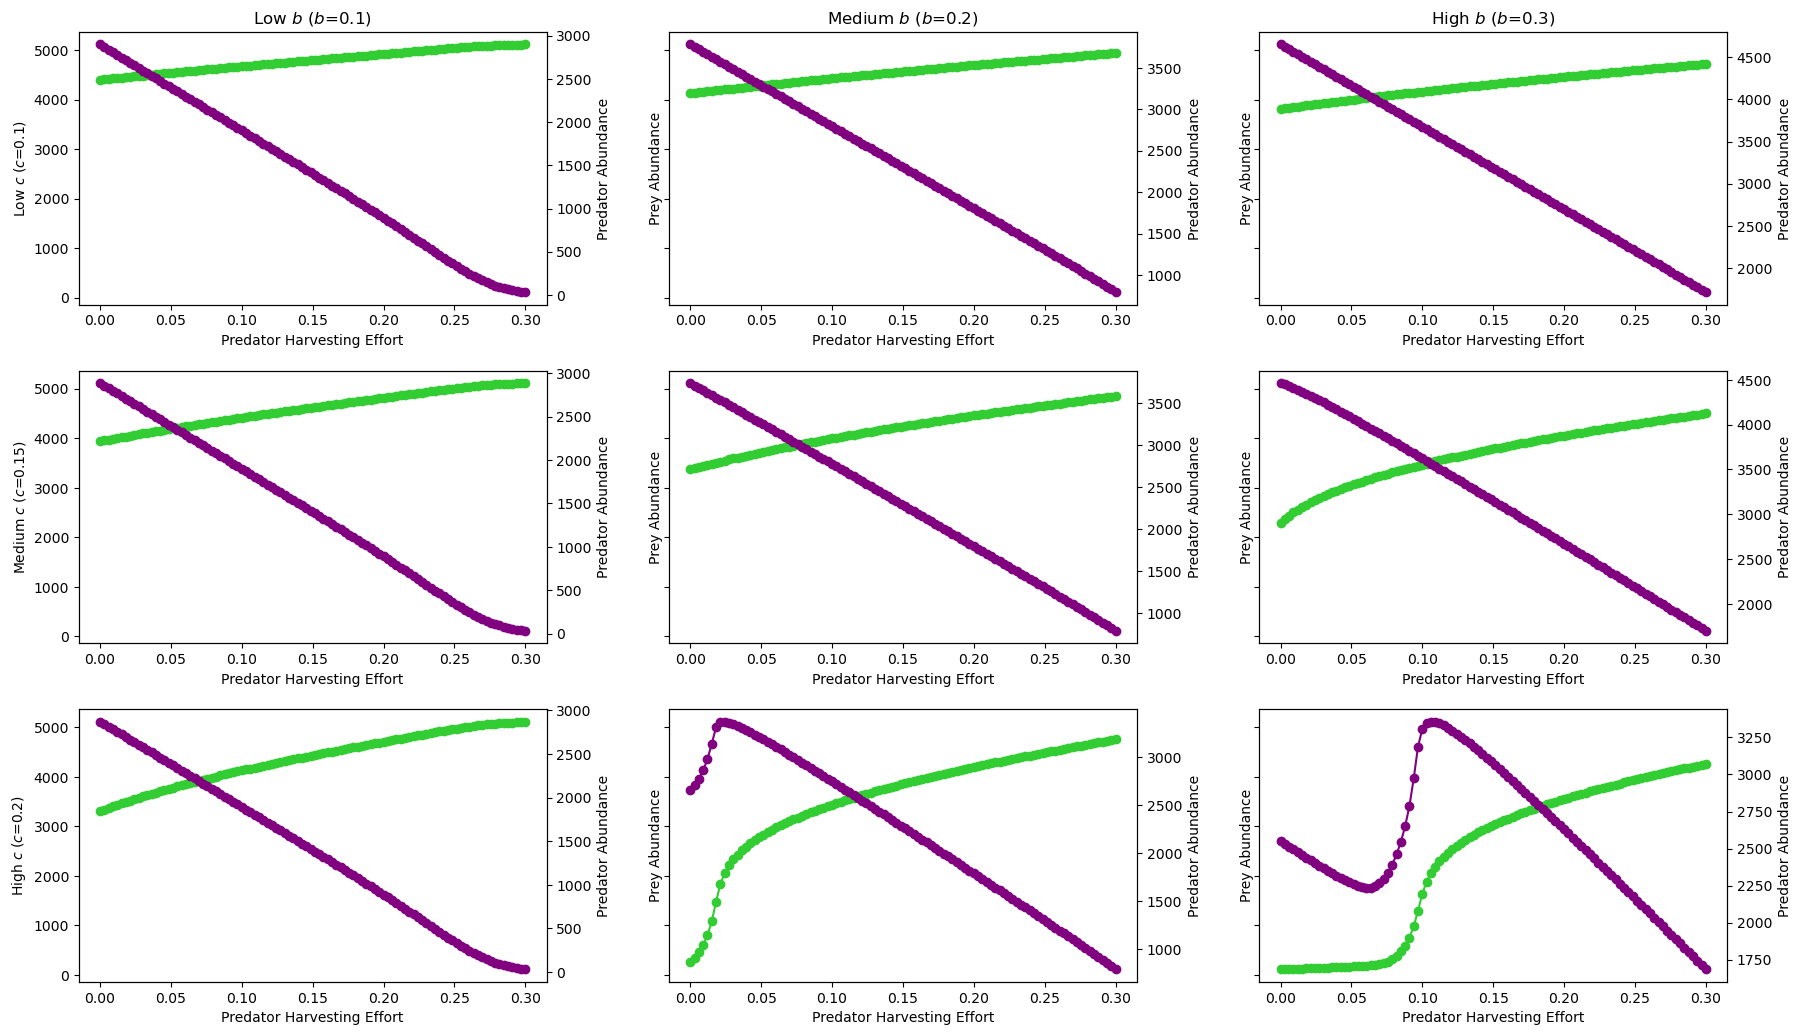

In [109]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize = (15,10), sharey= True)

ax1, ax1a = two_scales(ax1, E_P_array, H_final_array1, P_final_array1, 'limegreen', 'purple', 'o', 'o')
ax1.set_title("Low $b$ ($b$=0.1)")
ax1.set_ylabel("Low $c$ ($c$=0.1)")

ax2, ax2a = two_scales(ax2, E_P_array, H_final_array2, P_final_array2, 'limegreen', 'purple', 'o', 'o')
ax2.set_title("Medium $b$ ($b$=0.2)")

ax3, ax3a = two_scales(ax3, E_P_array, H_final_array3, P_final_array3, 'limegreen', 'purple', 'o', 'o')
ax3.set_title("High $b$ ($b$=0.3)")

ax4, ax4a = two_scales(ax4, E_P_array, H_final_array4, P_final_array4, 'limegreen', 'purple', 'o', 'o')
ax4.set_ylabel("Medium $c$ ($c$=0.15)")

ax5, ax5a = two_scales(ax5, E_P_array, H_final_array5, P_final_array5, 'limegreen', 'purple', 'o', 'o')

ax6, ax6a = two_scales(ax6, E_P_array, H_final_array6, P_final_array6, 'limegreen', 'purple', 'o', 'o')

ax7, ax7a = two_scales(ax7, E_P_array, H_final_array7, P_final_array7, 'limegreen', 'purple', 'o', 'o')
ax7.set_ylabel("High $c$ ($c$=0.2)")

ax8, ax8a = two_scales(ax8, E_P_array, H_final_array8, P_final_array8, 'limegreen', 'purple', 'o', 'o')

ax9, ax9a = two_scales(ax9, E_P_array, H_final_array9, P_final_array9, 'limegreen', 'purple', 'o', 'o')

#fig.suptitle('Time Series Varied $b$ and $c$ Values', fontsize=16)
plt.tight_layout()
fig.set_size_inches(18.5, 10.5)
plt.savefig("ICRS_figures/Baseline_3x3_fishing.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

## MSY Figures? 

In [78]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.1 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array1, P_array1, H_harvest_array1, P_harvest_array1 = run_model(H0, P0, parameters_dict)

In [79]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array1 = np.zeros(size)
P_final_array1 = np.zeros(size)
H_harvest_final_array1 = np.zeros(size)
P_harvest_final_array1 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array1, P_array1, H_harvest_array1, P_harvest_array1 = run_model(H0, P0, parameters_dict)
    H_final_array1[i] = np.mean(H_array1[-200:-1])
    P_final_array1[i] = np.mean(P_array1[-200:-1])
    H_harvest_final_array1[i] = np.mean(H_harvest_array1[-200:-1])
    P_harvest_final_array1[i] = np.mean(P_harvest_array1[-200:-1])

In [80]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.2 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array2, P_array2, H_harvest_array2, P_harvest_array2 = run_model(H0, P0, parameters_dict)

In [81]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array2 = np.zeros(size)
P_final_array2 = np.zeros(size)
H_harvest_final_array2 = np.zeros(size)
P_harvest_final_array2 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array2, P_array2, H_harvest_array2, P_harvest_array2 = run_model(H0, P0, parameters_dict)
    H_final_array2[i] = np.mean(H_array2[-200:-1])
    P_final_array2[i] = np.mean(P_array2[-200:-1])
    H_harvest_final_array2[i] = np.mean(H_harvest_array2[-200:-1])
    P_harvest_final_array2[i] = np.mean(P_harvest_array2[-200:-1])

In [82]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.3 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array3, P_array3, H_harvest_array3, P_harvest_array3 = run_model(H0, P0, parameters_dict)

In [83]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array3 = np.zeros(size)
P_final_array3 = np.zeros(size)
H_harvest_final_array3 = np.zeros(size)
P_harvest_final_array3 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array3, P_array3, H_harvest_array3, P_harvest_array3 = run_model(H0, P0, parameters_dict)
    H_final_array3[i] = np.mean(H_array3[-200:-1])
    P_final_array3[i] = np.mean(P_array3[-200:-1])
    H_harvest_final_array3[i] = np.mean(H_harvest_array3[-200:-1])
    P_harvest_final_array3[i] = np.mean(P_harvest_array3[-200:-1])

In [84]:
total_harvest = np.add(H_harvest_final_array1, P_harvest_final_array1)

In [85]:
total_harvest

array([291.24090948, 299.92218866, 308.42013835, 316.73505689,
       324.86723636, 332.81696323, 340.58451896, 348.17018058,
       355.57422125, 362.79691083, 369.83851633, 376.69930245,
       383.37953204, 389.87946659, 396.19936668, 402.33949244,
       408.30010399, 414.08146188, 419.68382756, 425.10746381,
       430.35263519, 435.41960852, 440.30865331, 445.02004225,
       449.55405171, 453.91096224, 458.09105906, 462.09463266,
       465.92197929, 469.57340161, 473.04920929, 476.34971965,
       479.47525835, 482.42616015, 485.20276967, 487.80544219,
       490.23454459, 492.49045626, 494.57357013, 496.48429378,
       498.22305062, 499.79028118, 501.18644452, 502.41201974,
       503.46750765, 504.35343261, 505.07034452, 505.61882106,
       505.99947013, 506.21293259, 506.25988529, 506.14104451,
       505.85716979, 505.40906831, 504.79759983, 504.0236824 ,
       503.08829888, 501.99250455, 500.7374359 , 499.32432104,
       497.75449189, 496.0293987 , 494.15062731, 492.11

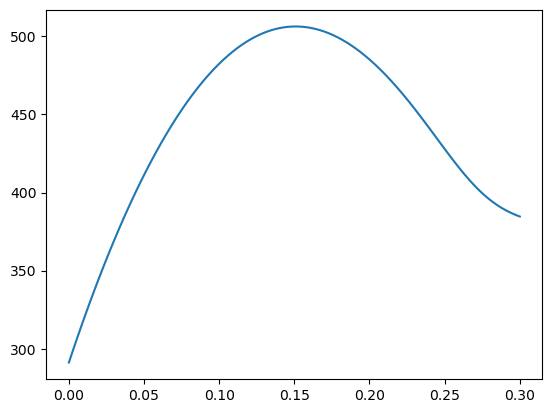

In [86]:
plt.plot(E_P_array, total_harvest)

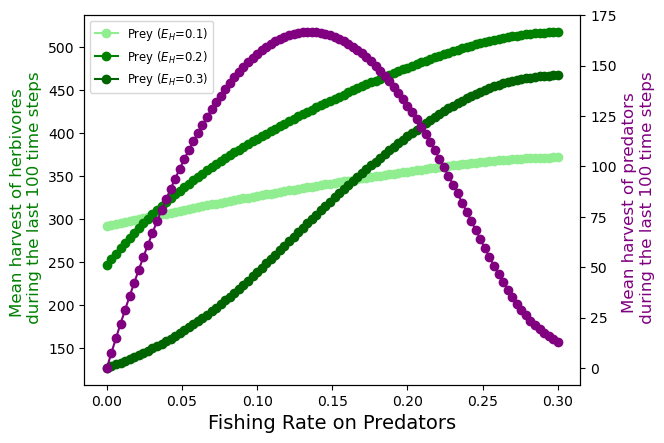

In [87]:
fig,ax = plt.subplots()
ax.plot(E_P_array, H_harvest_final_array1, color="lightgreen", marker="o")
ax.plot(E_P_array, H_harvest_final_array2, color="green", marker="o")
ax.plot(E_P_array, H_harvest_final_array3, color="darkgreen", marker="o")
ax.set_xlabel("Fishing Rate on Predators",fontsize=14)
ax.set_ylabel("Mean harvest of herbivores \n during the last 100 time steps",color="green",fontsize=12)
ax2=ax.twinx()
ax2.plot(E_P_array, P_harvest_final_array1,color="purple",marker="o")
ax2.set_ylabel("Mean harvest of predators \n during the last 100 time steps",color="purple",fontsize=12)
ax.legend(['Prey ($E_H$=0.1)','Prey ($E_H$=0.2)', 'Prey ($E_H$=0.3)'], fontsize="small")
plt.show()


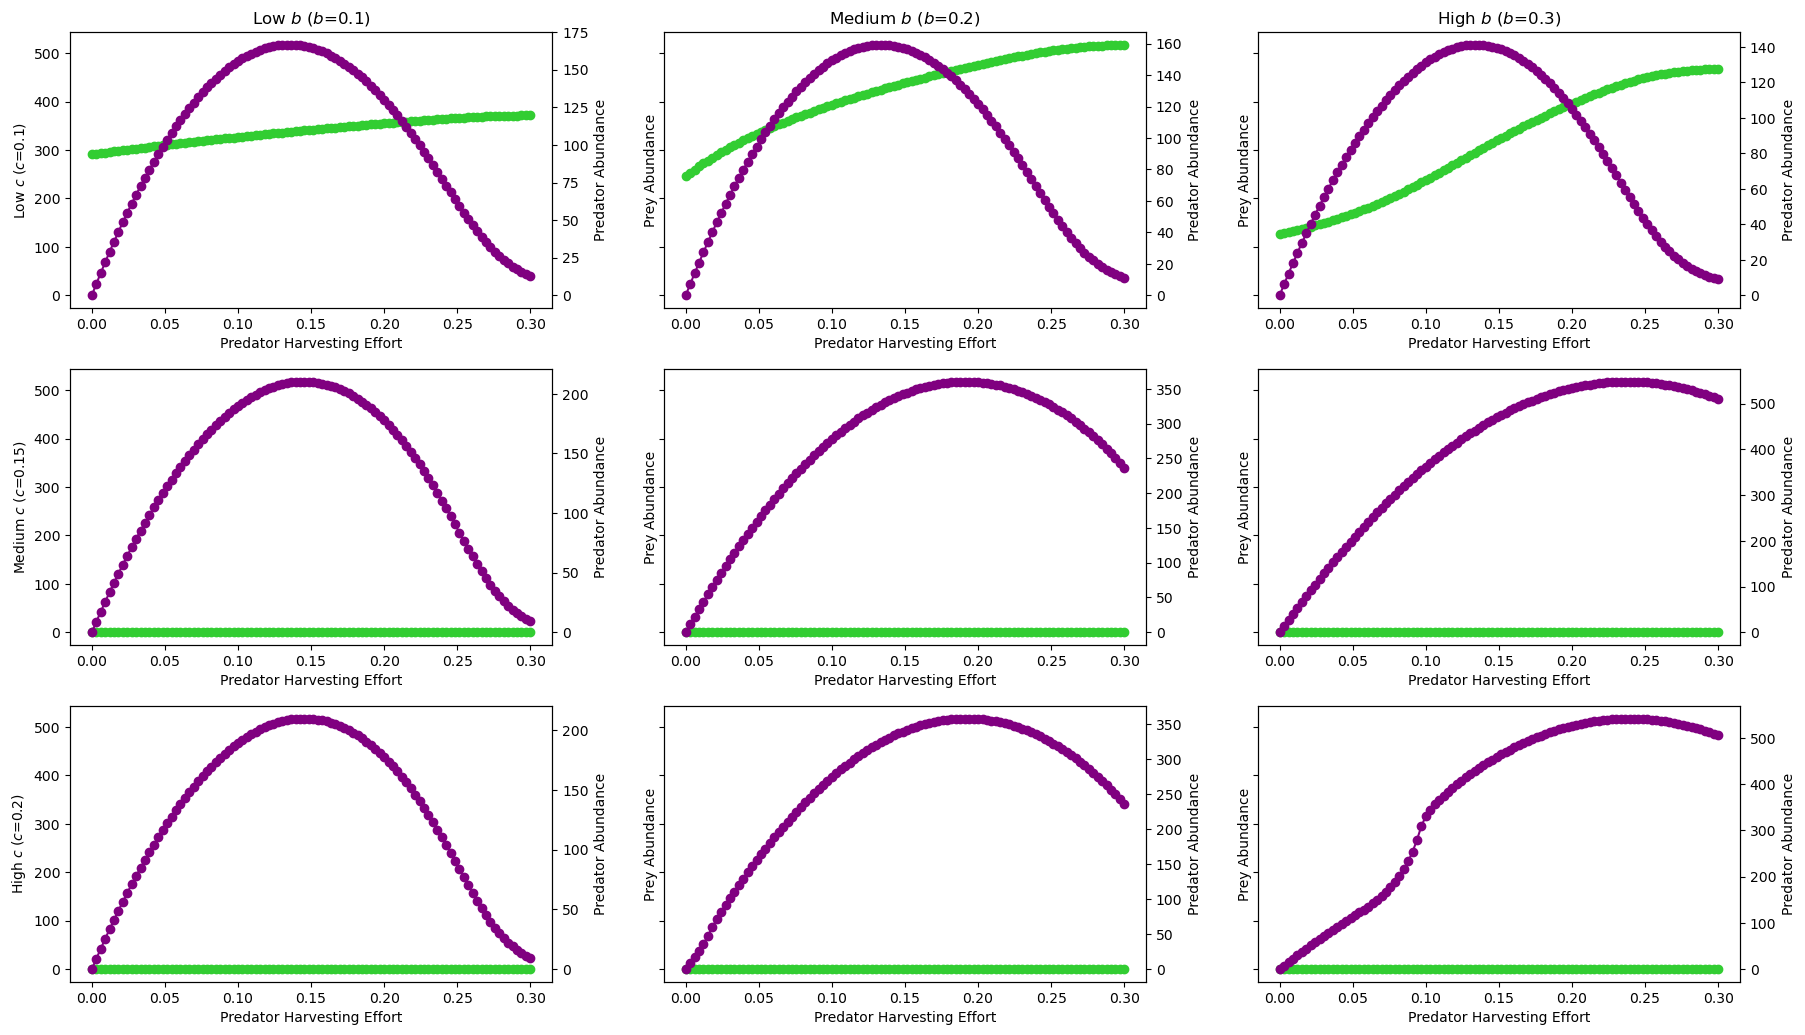

In [88]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize = (15,10), sharey= True)

ax1, ax1a = two_scales(ax1, E_P_array, H_harvest_final_array1, P_harvest_final_array1, 'limegreen', 'purple', 'o', 'o')
ax1.set_title("Low $b$ ($b$=0.1)")
ax1.set_ylabel("Low $c$ ($c$=0.1)")

ax2, ax2a = two_scales(ax2, E_P_array, H_harvest_final_array2, P_harvest_final_array2, 'limegreen', 'purple', 'o', 'o')
ax2.set_title("Medium $b$ ($b$=0.2)")

ax3, ax3a = two_scales(ax3, E_P_array, H_harvest_final_array3, P_harvest_final_array3, 'limegreen', 'purple', 'o', 'o')
ax3.set_title("High $b$ ($b$=0.3)")

ax4, ax4a = two_scales(ax4, E_P_array, H_harvest_final_array4, P_harvest_final_array4, 'limegreen', 'purple', 'o', 'o')
ax4.set_ylabel("Medium $c$ ($c$=0.15)")

ax5, ax5a = two_scales(ax5, E_P_array, H_harvest_final_array5, P_harvest_final_array5, 'limegreen', 'purple', 'o', 'o')

ax6, ax6a = two_scales(ax6, E_P_array, H_harvest_final_array6, P_harvest_final_array6, 'limegreen', 'purple', 'o', 'o')

ax7, ax7a = two_scales(ax7, E_P_array, H_harvest_final_array7, P_harvest_final_array7, 'limegreen', 'purple', 'o', 'o')
ax7.set_ylabel("High $c$ ($c$=0.2)")

ax8, ax8a = two_scales(ax8, E_P_array, H_harvest_final_array8, P_harvest_final_array8, 'limegreen', 'purple', 'o', 'o')

ax9, ax9a = two_scales(ax9, E_P_array, H_harvest_final_array9, P_harvest_final_array9, 'limegreen', 'purple', 'o', 'o')

#fig.suptitle('Time Series Varied $b$ and $c$ Values', fontsize=16)
plt.tight_layout()
fig.set_size_inches(18.5, 10.5)

## Heatmap

In [119]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [120]:
H0 = 1000
P0 = 100

H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [121]:
size = 50
heatmap_H = np.zeros((size, size))
heatmap_P = np.zeros((size, size))
b_array = np.linspace(0, 0.3, size)
c_array = np.linspace(0, 0.3, size)

In [122]:
for i in np.arange(0, size):
    for j in np.arange(0, size):
        b = b_array[i]
        c = c_array[j] 
        parameters_dict['b'] = b 
        parameters_dict['c'] = c
        H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
        H_last = np.mean(H_array[-10:-1])
        P_last = np.mean(P_array[-10:-1])
        heatmap_H[i,j] = H_last
        heatmap_P[i,j] = P_last
        j+=1
    i+=1


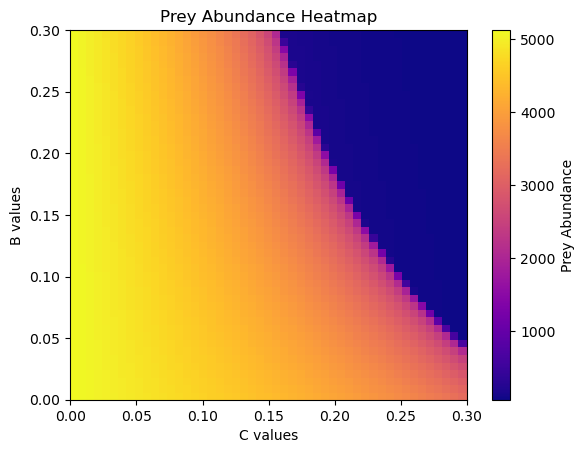

In [123]:
plt.pcolormesh(c_array, b_array, heatmap_H, cmap=plt.cm.get_cmap('plasma'),shading='auto')
plt.colorbar(label="Prey Abundance")
plt.xlabel("C values")
plt.ylabel("B values")
plt.title("Prey Abundance Heatmap")
plt.savefig("ICRS_figures/Heatmap_herbivore.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

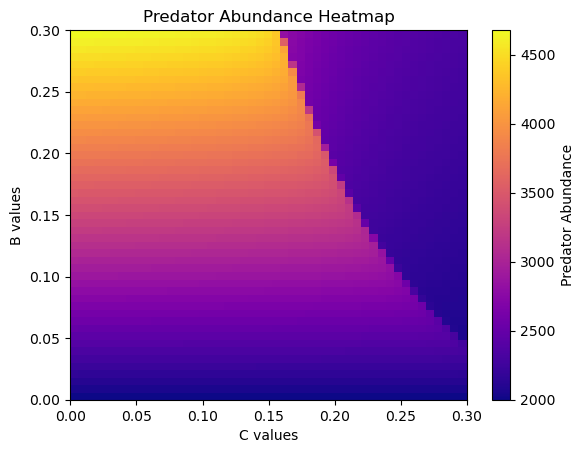

In [124]:
plt.pcolormesh(c_array, b_array, heatmap_P, cmap=plt.cm.get_cmap('plasma'),shading='auto')
plt.colorbar(label="Predator Abundance")
plt.xlabel("C values")
plt.ylabel("B values")
plt.title("Predator Abundance Heatmap")
plt.savefig("ICRS_figures/Heatmap_predator.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

In [125]:
size = 50
heatmap_T = np.zeros((size, size))
b_array = np.linspace(0, 0.3, size)
c_array = np.linspace(0, 0.3, size)

In [126]:
for i in np.arange(0, size):
    for j in np.arange(0, size):
        b = b_array[i]
        c = c_array[j] 
        parameters_dict['b'] = b 
        parameters_dict['c'] = c
        H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
        T_last = np.mean(np.add(H_array[-10:-1], P_array[-10:-1]))
        heatmap_T[i,j] = T_last
        j+=1
    i+=1
    

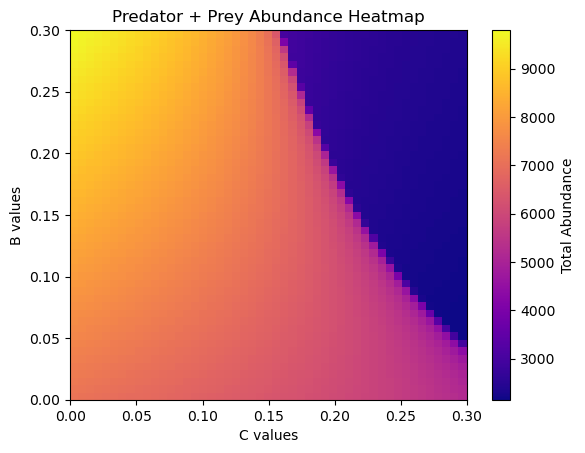

In [127]:
plt.pcolormesh(c_array, b_array, heatmap_T, cmap=plt.cm.get_cmap('plasma'),shading='auto')
plt.colorbar(label="Total Abundance")
plt.xlabel("C values")
plt.ylabel("B values")
plt.title("Predator + Prey Abundance Heatmap")
plt.savefig("ICRS_figures/Heatmap_total.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

# Fishing Heatmaps

In [128]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.5 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.3 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.3 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [129]:
H0 = 1000
P0 = 100

H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [130]:
size = 50
heatmap_H = np.zeros((size, size))
heatmap_P = np.zeros((size, size))
E_H_array = np.linspace(0, 1.0, size)
E_P_array = np.linspace(0, 1.0, size)

In [131]:
for i in np.arange(0, size):
    for j in np.arange(0, size):
        E_H = E_H_array[i]
        E_P = E_P_array[j] 
        parameters_dict['E_H'] = E_H 
        parameters_dict['E_P'] = E_P
        H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
        H_last = np.mean(H_array[-10:-1])
        P_last = np.mean(P_array[-10:-1])
        heatmap_H[i,j] = H_last
        heatmap_P[i,j] = P_last
        j+=1
    i+=1


Text(0.5, 1.0, 'Prey Abundance Heatmap - Fishing')

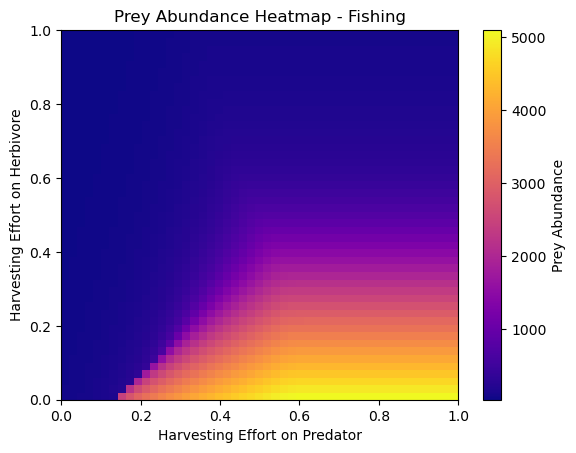

In [132]:
plt.pcolormesh(E_P_array, E_H_array, heatmap_H, cmap=plt.cm.get_cmap('plasma'),shading='auto')
plt.colorbar(label="Prey Abundance")
plt.xlabel("Harvesting Effort on Predator")
plt.ylabel("Harvesting Effort on Herbivore")
plt.title("Prey Abundance Heatmap - Fishing")
#plt.savefig("ICRS_figures/Heatmap_fishing_prey.jpg",
            #format='jpeg',
            #dpi=300,
            #bbox_inches='tight')

Text(0.5, 1.0, 'Predator Abundance Heatmap - Fishing')

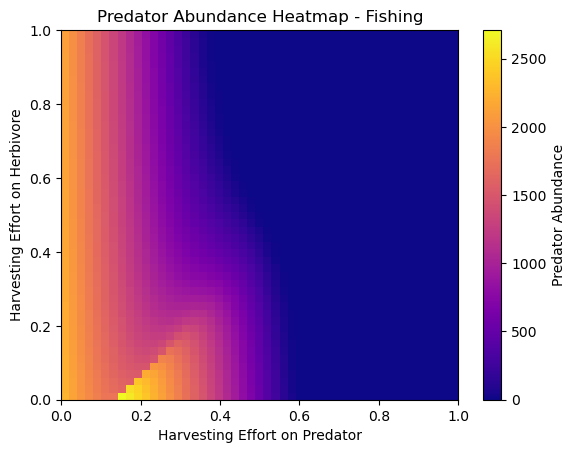

In [133]:
plt.pcolormesh(E_P_array, E_H_array, heatmap_P, cmap=plt.cm.get_cmap('plasma'),shading='auto')
plt.colorbar(label="Predator Abundance")
plt.xlabel("Harvesting Effort on Predator")
plt.ylabel("Harvesting Effort on Herbivore")
plt.title("Predator Abundance Heatmap - Fishing")
#plt.savefig("ICRS_figures/Heatmap_fishing_predator.jpg",
            #format='jpeg',
            #dpi=300,
            #bbox_inches='tight')

In [134]:
size = 50
heatmap_T = np.zeros((size, size))
E_H_array = np.linspace(0, 1.0, size)
E_P_array = np.linspace(0, 1.0, size)

In [135]:
for i in np.arange(0, size):
    for j in np.arange(0, size):
        E_H = E_H_array[i]
        E_P = E_P_array[j] 
        parameters_dict['E_H'] = E_H 
        parameters_dict['E_P'] = E_P
        H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
        T_last = np.mean(np.add(H_array[-10:-1], P_array[-10:-1]))
        heatmap_T[i,j] = T_last
        j+=1
    i+=1
    

Text(0.5, 1.0, 'Predator + Prey Abundance Heatmap - Fishing')

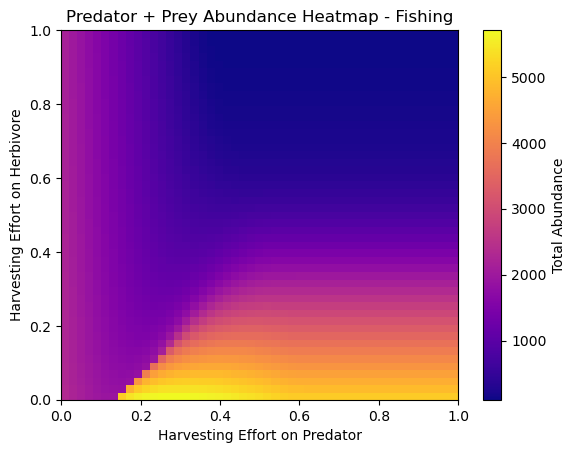

In [136]:
plt.pcolormesh(E_H_array, E_P_array, heatmap_T, cmap=plt.cm.get_cmap('plasma'),shading='auto')
plt.colorbar(label="Total Abundance")
plt.xlabel("Harvesting Effort on Predator")
plt.ylabel("Harvesting Effort on Herbivore")
plt.title("Predator + Prey Abundance Heatmap - Fishing")
#plt.savefig("ICRS_figures/Heatmap_fishing_total.jpg",
            #format='jpeg',
            #dpi=300,
            #bbox_inches='tight')

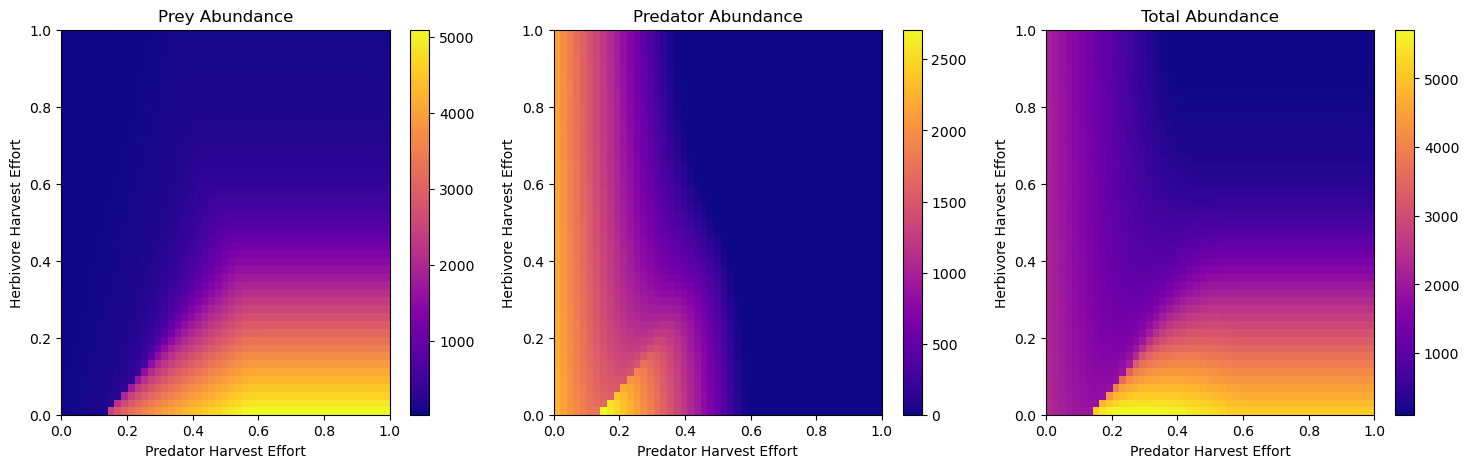

In [149]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize = (18,5))

im = ax0.pcolormesh(E_P_array, E_H_array, heatmap_H, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax0, orientation="vertical", pad = 0.05)
ax0.set_title(label="Prey Abundance")
ax0.set_ylabel("Herbivore Harvest Effort")
ax0.set_xlabel("Predator Harvest Effort")

im = ax1.pcolormesh(E_P_array, E_H_array, heatmap_P, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax1, orientation="vertical", pad = 0.05)
ax1.set_title(label="Predator Abundance")
ax1.set_ylabel("Herbivore Harvest Effort")
ax1.set_xlabel("Predator Harvest Effort")

im = ax2.pcolormesh(E_H_array, E_P_array, heatmap_T, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax2, orientation= "vertical", pad = 0.05)
ax2.set_title(label="Total Abundance")
ax2.set_ylabel("Herbivore Harvest Effort")
ax2.set_xlabel("Predator Harvest Effort")

plt.savefig("ICRS_figures/three_panel_fishing_heatmap.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

## Vector Fields 

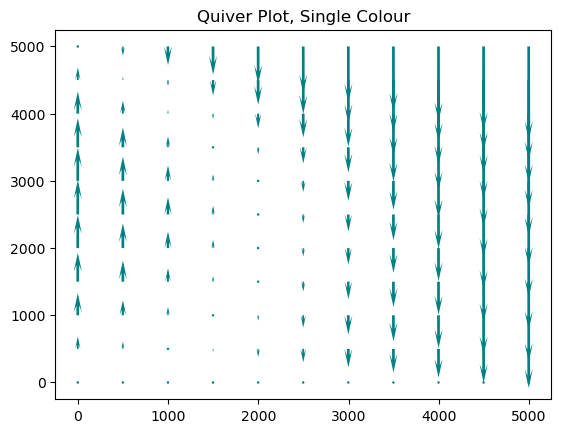

In [27]:
nx, ny = 500, 500
x = np.arange(-3, 5000, nx)
y = np.arange(-2, 5000, ny)
X, Y = np.meshgrid(x, y)

dy = 0.4*Y*(1-Y/5000) - (0.3*Y*X)/(500+Y)
dx = np.ones(dy.shape)

plot2 = plt.figure()
plt.quiver(X, Y, dx, dy, 
           color='teal', 
           headlength=7)

plt.title('Quiver Plot, Single Colour')
plt.show(plot2)

ValueError: Argument U has a size 11 which does not match 121, the number of arrow positions

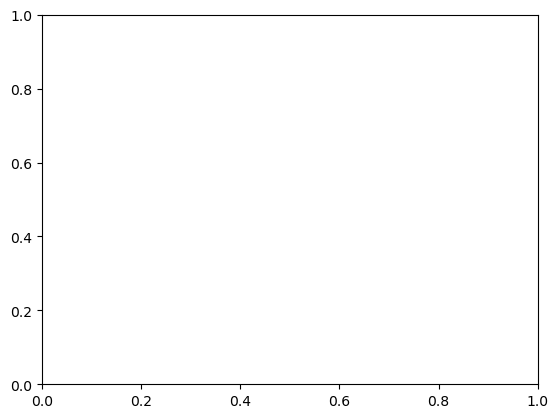

In [28]:
nx, ny = 500, 500
x = np.arange(-3, 5000, nx)
y = np.arange(-2, 5000, ny)
X, Y = np.meshgrid(x, y)

dy = x
dx = np.ones(dy.shape)

plot2 = plt.figure()
plt.quiver(X, Y, dx, dy, 
           color='teal', 
           headlength=7)

plt.title('Quiver Plot, Single Colour')
plt.show(plot2)

In [621]:
#H_nullcline = (((10 + Y)*((0.4*Y)-(0.4*Y**2)/100))/(0.3*Y))

In [29]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

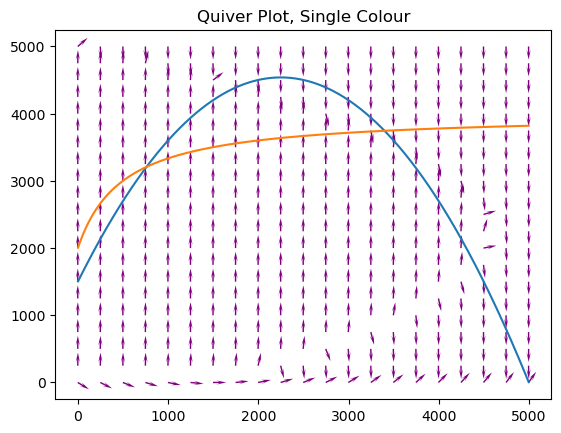

In [30]:
nx, ny = 250, 250
x = np.arange(-3, 5000, nx)
y = np.arange(-2, 5000, ny)
X, Y = np.meshgrid(x, y)

dy = r_H*Y*(1-Y/K_H) - (c*Y*X)/(d+Y)
dx = np.ones(dy.shape)

dyu = dy/np.sqrt(dx**2+dy**2)
dxu = dx/np.sqrt(dx**2+dy**2)

plot2 = plt.figure()
plt.quiver(X, Y, dxu, dyu, 
           color='purple', 
           headlength=7)

plt.title('Quiver Plot, Single Colour')
plt.plot(sp1_nullcline)
plt.plot(sp2_nullcline)
plt.show(plot2)

In [ ]:
X + np.sin(Y)

In [257]:
t = np.arange(0,10,1)
n = np.arange(0,2,.5)
T, N = np.meshgrid(t, n)

def dNdt(H, P, parameters_dict):
    #Unpacking herbivore parameters:
    r_H = parameters_dict['r_H'] # growth rate of herbivores
    K_H = parameters_dict['K_H'] # carrying capacity of herbivores
    theta_H = parameters_dict['theta_H'] # immigration of herbivores
    c = parameters_dict['c'] # attack rate by the predator
    d = parameters_dict['d'] # value of H when predation half its max value
    q_H = parameters_dict['q_H'] # proportionality constant for herbivore harvest
    E_H = parameters_dict['E_H'] # Effort for herbivore harvest
    #Unpacking predator parameters:
    r_P = parameters_dict['r_P'] # growth rate of predator 
    K_P = parameters_dict['K_P'] # carrying capactiy of predators 
    b = parameters_dict['b'] #
    theta_P = parameters_dict['theta_P'] # immigration of predators  
    q_P = parameters_dict['q_P'] # proportionality constant for predators harvest
    E_P = parameters_dict['E_P'] # Effort for predator harvest
    P = parameters_dict['P']
    
    #Calculate the derivative 
    dH = r_H*H*(1-H/K_H) - (c*H*P)/(d+H) + theta_H - q_H*E_H*H
    dP = r_P*P*(1-P/K_P) + (b*H*P)/(d+H) + theta_P - q_P*E_P*P
    
    return dH, dP

In [258]:
dNdT = f(T,N)
U = (1 / (1 + dHdT**2)**.5)*np.ones(T.shape)
V = (1 / (1 + dHdT**2)**.5)*dHdT

NameError: name 'f' is not defined

In [259]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
 
# I'm using this style for a pretier plot, but it's not actually necessary
plt.style.use('ggplot')
 
"""
This is to ignore RuntimeWarning: invalid value encountered in true_divide
I know that when my populations are zero there's some division by zero and
the resulting error terminates my function, which I want to avoid in this case.
"""
np.seterr(divide='ignore', invalid='ignore')
 
# These are the parameter values we'll be using
#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest
 
# Define the system of ODEs
# P[0] is prey, P[1] is predator
def fish(P, t=0):
    return ([r_H*P[0]*(1-P[0]/K_H) - (c*P[0]*P[1])/(d+P[0]) + theta_H - (q_H*E_H*P[0]),
             r_P*P[1]*(1-P[1]/K_P) + (b*P[0]*P[1])/(d+P[0]) + theta_P - (q_P*E_P*P[1]) ])

 
# Define equilibrium point
EQ = ([d/(a*(c-d*h)),b*(1+a*h*(d/(a*(c-d*h))))*(1-(d/(a*(c-d*h)))/K)/a])
 
"""
I need to define the possible values my initial points will take as they
relate to the equilibrium point. In this case I chose to plot 10 trajectories
ranging from 0.1 to 5
"""
values = np.linspace(0.1, 5, 10)
# I want each trajectory to have a different color
vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))
 
# Open figure
f = plt.figure()
"""
I need to define a range of time over which to integrate the system of ODEs
The values don't really matter in this case because our system doesn't have t
on the right hand side of dx/dt and dy/dt, but it is a necessary input for
integrate.odeint.
"""
t = np.linspace(0, 150, 1000)
 
# Plot trajectories by looping through the possible values
for v, col in zip(values, vcolors):
    # Starting point of each trajectory
    P0 = [E*v for E in EQ]
    # Integrate system of ODEs to get x and y values
    P = integrate.odeint(fish, P0, t)
    # Plot each trajectory
    plt.plot( P[:,0], P[:,1],
            # Different line width for different trajectories (optional)
            lw=0.5*v,
            # Different color for each trajectory
            color=col,
            # Assign starting point to trajectory label
            label='P0=(%.f, %.f)' % ( P0[0], P0[1]) )
"""
To plot the direction fields we first need to define a grid in order to
compute the direction at each point
"""
# Get limits of trajectory plot
ymax = plt.ylim(ymin=0)[1]
xmax = plt.xlim(xmin=0)[1]
# Define number of points
nb_points = 20
# Define x and y ranges
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
# Create meshgrid
X1 , Y1 = np.meshgrid(x,y)
# Calculate growth rate at each grid point
DX1, DY1 = fish([X1, Y1])
# Direction at each grid point is the hypotenuse of the prey direction and the
# predator direction.
M = (np.hypot(DX1, DY1))
# This is to avoid any divisions when normalizing
M[ M == 0] = 1.
# Normalize the length of each arrow (optional)
DX1 /= M
DY1 /= M
 
plt.title('Trajectories and direction fields')
"""
This is using the quiver function to plot the field of arrows using DX1 and
DY1 for direction and M for speed
"""
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
plt.xlabel('Prey abundance')
plt.ylabel('Predator abundance')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()

NameError: name 'a' is not defined

In [602]:
nx, ny = .3,.3
x = np.arange(-3,3, nx)
y = np.arange(-2,2, ny)
X,Y = np.meshgrid(X,Y)

#r_H = 0.4
#K_H = 100
#c = 0.1
#d = 10

dy = (r_H*Y*(1-Y/K_H)) - (c*Y*X)/(d+Y)
#dx = np.ones(dy.shape)

#dyu = dy/np.sqrt(dx**2 + dy**2)
#dxu = dx/np.sqrt(dx**2 + dy**2) 

MemoryError: Unable to allocate array with shape (125440000, 125440000) and data type float64

(-4.0, 4.0)

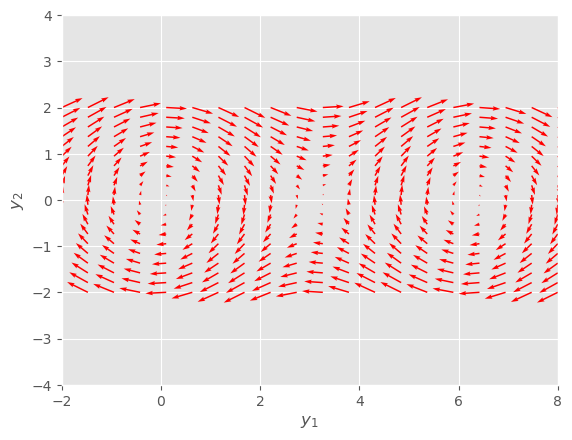

In [260]:
import numpy as np
import matplotlib.pyplot as plt

def f(Y, t):
    y1, y2 = Y
    return [y2, -np.sin(y1)]

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])

In [484]:
from numpy import *
import pylab as p
# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75
def dX_dt(X, t=0):
    """ Return the growth rate of predator and prey populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

In [485]:
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True

True

In [459]:
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

In [460]:
A_f0 = d2X_dt2(X_f0)                    # >>> array([[ 1. , -0. ],
                                        #            [ 0. , -1.5]])

In [461]:
A_f1 = d2X_dt2(X_f1)                    # >>> array([[ 0.  , -2.  ],
                                        #            [ 0.75,  0.  ]])
# whose eigenvalues are +/- sqrt(c*a).j:
lambda1, lambda2 = linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)
# They are imaginary numbers. The fox and rabbit populations are periodic as follows from further
# analysis. Their period is given by:
T_f1 = 2*pi/abs(lambda1)                # >>> 5.130199

In [462]:
from scipy import integrate
t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

Text(0.5, 1.0, 'Evolution of predator and prey populations')

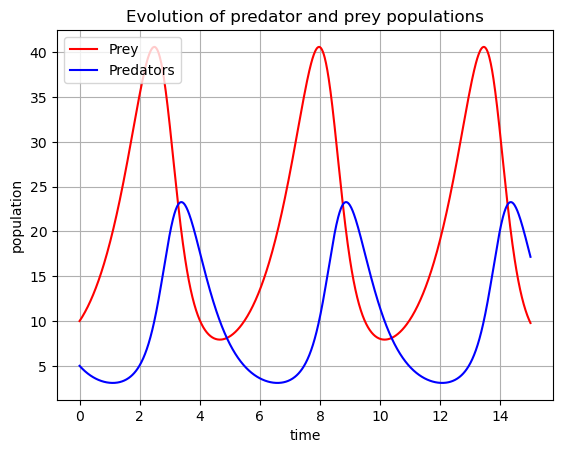

In [463]:
rabbits, foxes = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Prey')
p.plot(t, foxes  , 'b-', label='Predators')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of predator and prey populations')

(0.0, 36.87747453556006)

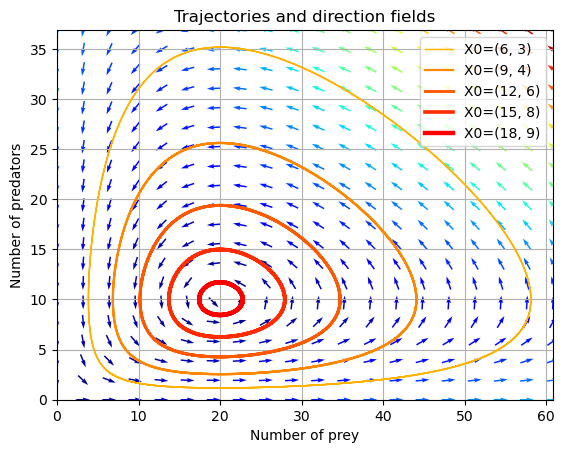

In [464]:
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of prey')
p.ylabel('Number of predators')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)

In [281]:
def IF(X):
    u, v = X
    return u**(c/a) * v * exp( -(b/a)*(d*u+v) )
# We will verify that IF remains constant for different trajectories
for v in values:
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)
    I = IF(X.T)                                 # compute IF along the trajectory
    I_mean = I.mean()
    delta = 100 * (I.max()-I.min())/I_mean
    print('X0=(%2.f,%2.f) => I ~ %.1f |delta = %.3G %%' % (X0[0], X0[1], I_mean, delta))
# >>> X0=( 6, 3) => I ~ 20.8 |delta = 6.19E-05 %
#     X0=( 9, 4) => I ~ 39.4 |delta = 2.67E-05 %
#     X0=(12, 6) => I ~ 55.7 |delta = 1.82E-05 %
#     X0=(15, 8) => I ~ 66.8 |delta = 1.12E-05 %
#     X0=(18, 9) => I ~ 72.4 |delta = 4.68E-06 %

X0=( 6, 3) => I ~ 20.8 |delta = 6.19E-05 %
X0=( 9, 4) => I ~ 39.4 |delta = 2.67E-05 %
X0=(12, 6) => I ~ 55.7 |delta = 1.82E-05 %
X0=(15, 8) => I ~ 66.8 |delta = 1.12E-05 %
X0=(18, 9) => I ~ 72.4 |delta = 4.68E-06 %


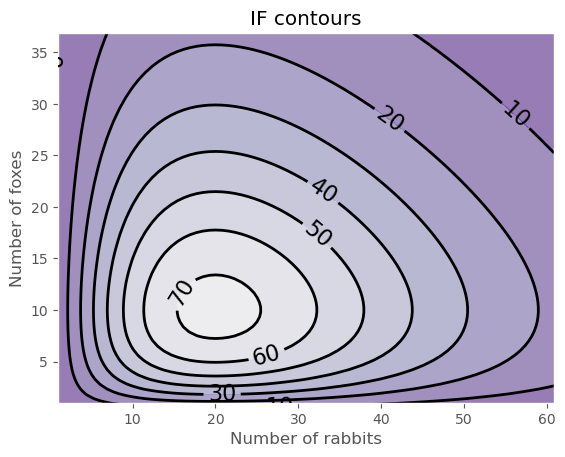

In [282]:
# plot iso contours
nb_points = 80                              # grid size
x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)
X2 , Y2  = meshgrid(x, y)                   # create the grid
Z2 = IF([X2, Y2])                           # compute IF on each point
f3 = p.figure()
CS = p.contourf(X2, Y2, Z2, cmap=p.cm.Purples_r, alpha=0.5)
CS2 = p.contour(X2, Y2, Z2, colors='black', linewidths=2. )
p.clabel(CS2, inline=1, fontsize=16, fmt='%.f')
p.grid()
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.ylim(1, ymax)
p.xlim(1, xmax)
p.title('IF contours')
p.show()

In [529]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 0 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [530]:
H0 = 1000
P0 = 100

H_array2, P_array2, H_harvest_array2, P_harvest_array2 = run_model(H0, P0, parameters_dict)

In [505]:
from numpy import *
import pylab as p
# Definition of parameters
#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
#theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
#q_H = 1. # proportionality constant for herbivore harvest 
#E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
#theta_P = 0 # immigration of predators 
#q_P = 1. # proportionality constant for predator harvest 
#E_P = 0.0 # Effort for predator harvest
def dX_dt(X, t=0):
    """ Return the growth rate of predator and prey populations. """
    return array([((r_H*X[0])*(1-(X[0]/K_H))) - ((c*X[0]*X[1])/(d+X[0])),
             (r_P*X[1]*(1-(X[1]/K_P))) + ((b*X[0]*X[1])/(d+X[0]))])

In [506]:
X_f0 = array([     0. ,  0.])
X_f1 = array([ K_H, 0])
X_f2 = array([0, K_P])
X_f3 = array([r_H-((r_H*X[0])/K_P)-(c*X[1]), r_P-((r_P*X[1])/K_P)+b*X[0]])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) and all(dX_dt(X_f2) == zeros(2)) and all(dX_dt(X_f3) == zeros(2)) # => True

False

In [507]:
X_f3

array([[-4.50769622e+02,  4.00000000e-01],
       [ 4.49749730e+02,  2.00000000e-01]])

In [508]:
from scipy import integrate
t = linspace(0, 15,  1000)              # time
X0 = array([1000, 100])                     # initials conditions: 1000 prey and 100 predators
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

Text(0.5, 1.0, 'Predator and prey populations')

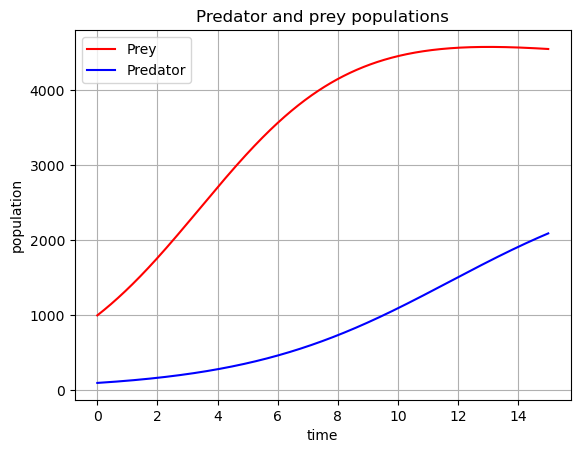

In [509]:
prey, predator = X.T
f1 = p.figure()
p.plot(t, prey, 'r-', label='Prey')
p.plot(t, predator, 'b-', label='Predator')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Predator and prey populations')

(0.0, 0.05500000000000001)

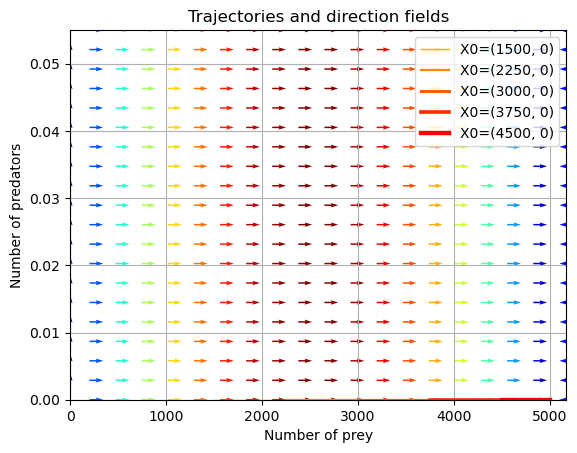

In [510]:
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of prey')
p.ylabel('Number of predators')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)

## Change in Abundance 

### Low Coupling

In [1600]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }


H0 = 1000
P0 = 100

H_array0, P_array0, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [1601]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.15 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H_array01, P_array01, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [1602]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.3 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H_array02, P_array02, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [1603]:
#Change in low fishing 
H_sub_array0 = np.subtract(H_array01, H_array0)
H_percent_change_low = np.divide(H_sub_array0, H_array0)

#Change in high fishing
H_sub_array1 = np.subtract(H_array02, H_array0)
H_percent_change_high = np.divide(H_sub_array1, H_array0)

#Change in low fishing
P_sub_array0 = np.subtract(P_array01, P_array0)
P_percent_change_low = np.divide(P_sub_array0, P_array0)

#Change in high fishing
P_sub_array1 = np.subtract(P_array02, P_array0)
P_percent_change_high = np.divide(P_sub_array1, P_array0)

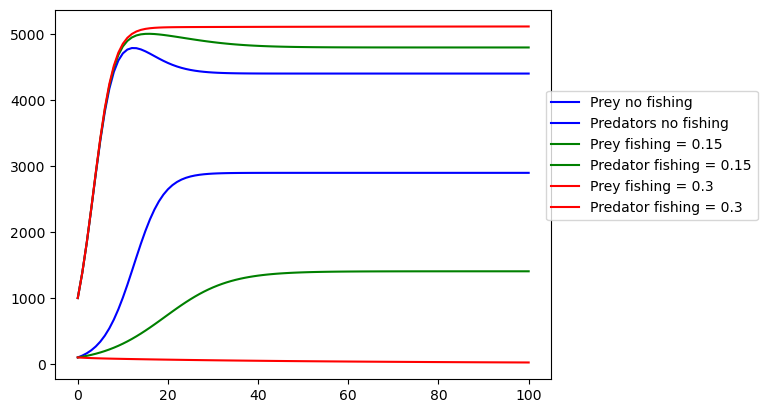

In [1604]:
plt.plot(H_array0, label = "Prey no fishing", c = "blue")
plt.plot(P_array0, label = "Predators no fishing", c = "blue")
plt.plot(H_array01, label = "Prey fishing = 0.15", c = "green")
plt.plot(P_array01, label = "Predator fishing = 0.15", c = "green")
plt.plot(H_array02, label = "Prey fishing = 0.3", c = "red")
plt.plot(P_array02, label = "Predator fishing = 0.3", c = "red")
plt.legend(bbox_to_anchor =(1.43, 0.8))

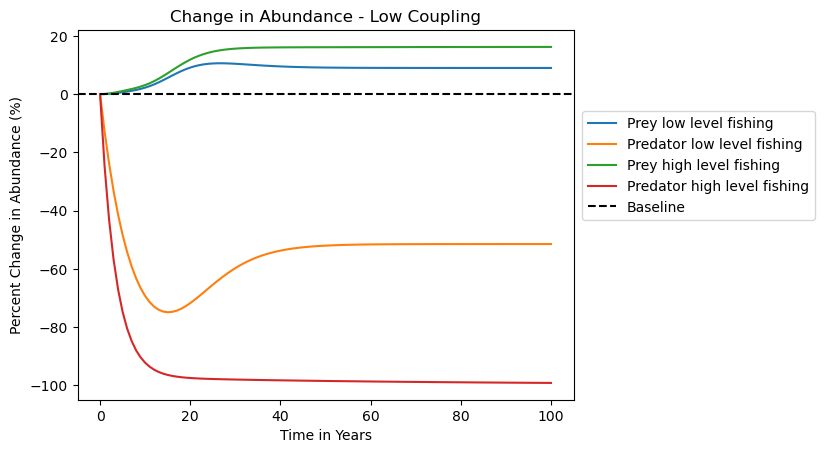

In [1605]:
plt.plot(H_percent_change_low*100, label = "Prey low level fishing")
plt.plot(P_percent_change_low*100, label = "Predator low level fishing")
plt.plot(H_percent_change_high*100, label = "Prey high level fishing")
plt.plot(P_percent_change_high*100, label = "Predator high level fishing")
plt.axhline(y=0,linestyle="dashed", label = "Baseline", c="black")
plt.xlabel("Time in Years")
plt.ylabel("Percent Change in Abundance (%)")
plt.legend(bbox_to_anchor =(1.5, 0.8))
plt.title("Change in Abundance - Low Coupling")
plt.savefig("ICRS_figures/Abundance_delta_low.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

### Medium Coupling 

In [1606]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }


H0 = 1000
P0 = 100

H_array0, P_array0, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [1607]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.15 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H_array01, P_array01, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [1608]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.3 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H_array02, P_array02, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [1609]:
#Change in low fishing 
H_sub_array0 = np.subtract(H_array01, H_array0)
H_percent_change_low = np.divide(H_sub_array0, H_array0)

#Change in high fishing
H_sub_array1 = np.subtract(H_array02, H_array0)
H_percent_change_high = np.divide(H_sub_array1, H_array0)

#Change in low fishing
P_sub_array0 = np.subtract(P_array01, P_array0)
P_percent_change_low = np.divide(P_sub_array0, P_array0)

#Change in high fishing
P_sub_array1 = np.subtract(P_array02, P_array0)
P_percent_change_high = np.divide(P_sub_array1, P_array0)

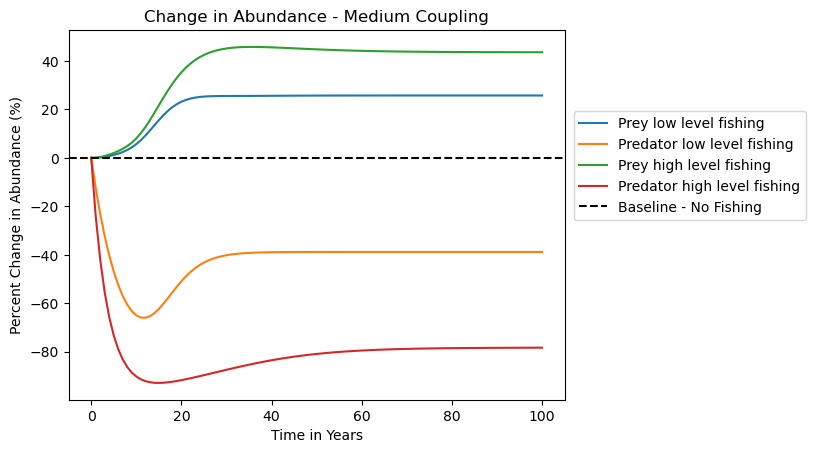

In [1610]:
plt.plot(H_percent_change_low*100, label = "Prey low level fishing")
plt.plot(P_percent_change_low*100, label = "Predator low level fishing")
plt.plot(H_percent_change_high*100, label = "Prey high level fishing")
plt.plot(P_percent_change_high*100, label = "Predator high level fishing")
plt.axhline(y=0,linestyle="dashed", label = "Baseline - No Fishing", c="black")
plt.xlabel("Time in Years")
plt.ylabel("Percent Change in Abundance (%)")
plt.legend(bbox_to_anchor =(1.5, 0.8))
plt.title("Change in Abundance - Medium Coupling")
plt.savefig("ICRS_figures/Abundance_delta_medium.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

### High Coupling

In [1611]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }


H0 = 1000
P0 = 100

H_array0, P_array0, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [1612]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.15 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H_array01, P_array01, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [1613]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.3 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H_array02, P_array02, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [1614]:
#Change in low fishing 
H_sub_array0 = np.subtract(H_array01, H_array0)
H_percent_change_low = np.divide(H_sub_array0, H_array0)

#Change in high fishing
H_sub_array1 = np.subtract(H_array02, H_array0)
H_percent_change_high = np.divide(H_sub_array1, H_array0)

#Change in low fishing
P_sub_array0 = np.subtract(P_array01, P_array0)
P_percent_change_low = np.divide(P_sub_array0, P_array0)

#Change in high fishing
P_sub_array1 = np.subtract(P_array02, P_array0)
P_percent_change_high = np.divide(P_sub_array1, P_array0)

In [1615]:
H_array01

array([1000.        , 1375.59786572, 1821.90330898, 2318.63929064,
       2830.23960218, 3313.29098751, 3729.17600998, 4054.71850306,
       4284.83342081, 4427.74134053, 4497.81814107, 4510.25300531,
       4478.58627237, 4414.25699506, 4326.96057455, 4225.03464893,
       4115.5949307 , 4004.47559613, 3896.14459795, 3793.72065263,
       3699.11990586, 3613.28906218, 3536.46247985, 3468.39591284,
       3408.55399421, 3356.24759574, 3310.7274438 , 3271.24384616,
       3237.08212121, 3207.58156516, 3182.14377588, 3160.23440245,
       3141.38104667, 3125.16908321, 3111.2365091 , 3099.26849809,
       3088.99205429, 3080.17098124, 3072.60127164, 3066.10695631,
       3060.53641147, 3055.75910162, 3051.66272445, 3048.15071944,
       3045.14010118, 3042.55958006, 3040.34793536, 3038.45260923,
       3036.82849288, 3035.43688004, 3034.24456514, 3033.22306696,
       3032.34796055, 3031.59830274, 3030.95613821, 3030.40607516,
       3029.93492074, 3029.53136804, 3029.1857274 , 3028.88969

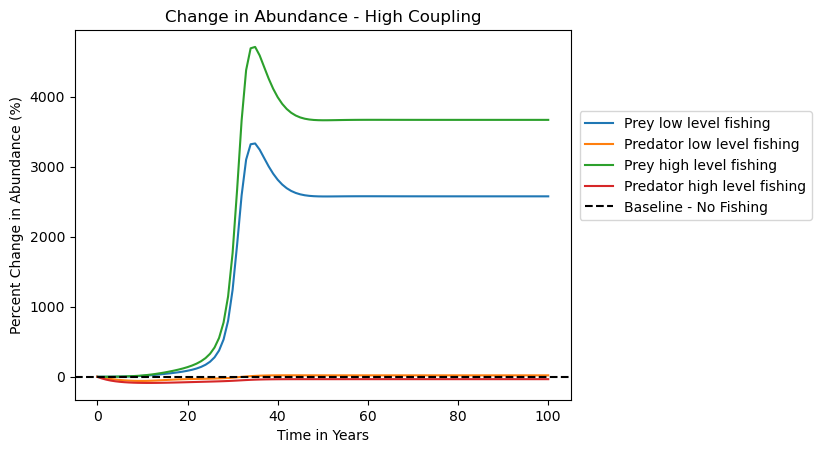

In [1616]:
plt.plot(H_percent_change_low*100, label = "Prey low level fishing")
plt.plot(P_percent_change_low*100, label = "Predator low level fishing")
plt.plot(H_percent_change_high*100, label = "Prey high level fishing")
plt.plot(P_percent_change_high*100, label = "Predator high level fishing")
plt.axhline(y=0,linestyle="dashed", label = "Baseline - No Fishing", c="black")
plt.xlabel("Time in Years")
plt.ylabel("Percent Change in Abundance (%)")
plt.legend(bbox_to_anchor =(1.5, 0.8))
plt.title("Change in Abundance - High Coupling")
plt.savefig("ICRS_figures/Abundance_delta_high.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

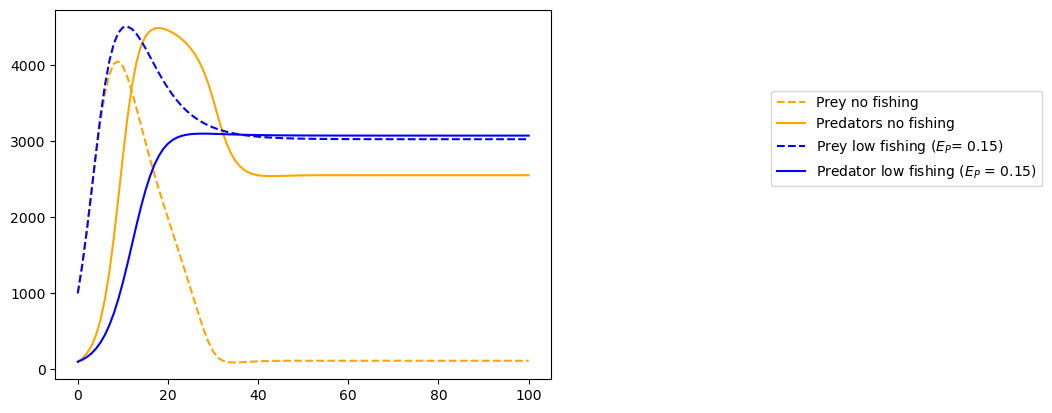

In [1532]:
plt.plot(H_array0, label = "Prey no fishing", c="orange", linestyle="dashed")
plt.plot(P_array0, label = "Predators no fishing", c="orange")
plt.plot(H_array01, label = "Prey low fishing ($E_P$= 0.15)", c="blue", linestyle="dashed")
plt.plot(P_array01, label = "Predator low fishing ($E_P$ = 0.15)", c="blue")
plt.legend(bbox_to_anchor =(1.43, 0.8))

In [ ]:
plt.plot(H_array0, label = "Prey no fishing")
plt.plot(P_array0, label = "Predators no fishing")
plt.plot(H_array01, label = "Prey fishing = 0.15")
plt.plot(P_array01, label = "Predator fishing = 0.15")
plt.plot(H_array02, label = "Prey fishing = 0.3")
plt.plot(P_array02, label = "Predator fishing = 0.3")
plt.legend(bbox_to_anchor =(1.43, 0.8))

# Phase Plane

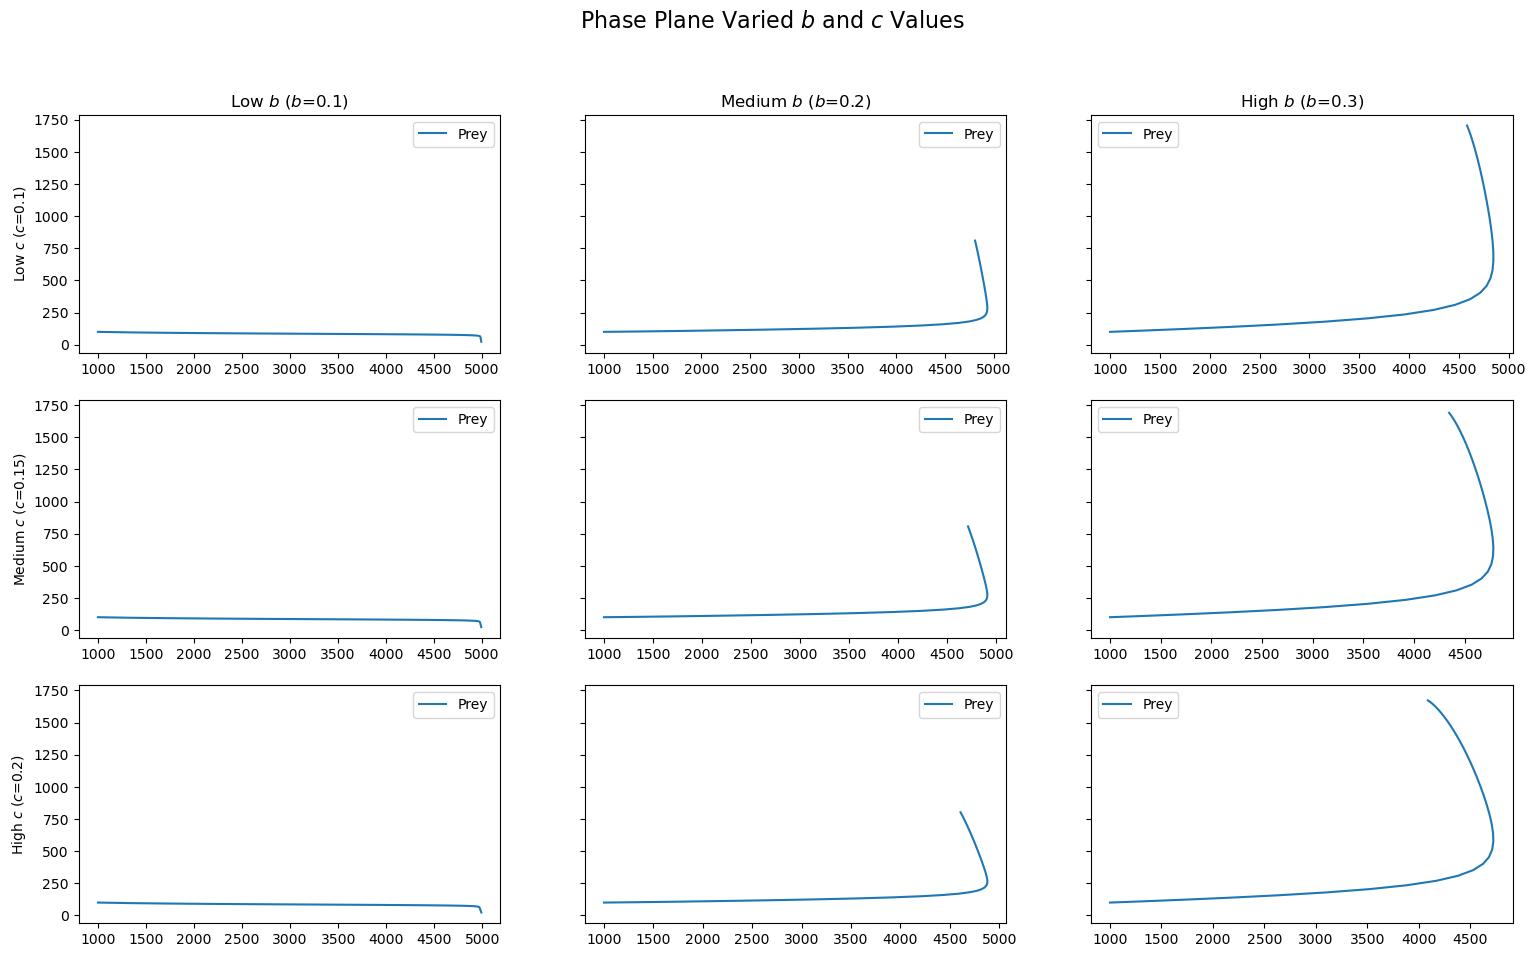

In [649]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharey= True)
ax1.plot(H_array1, P_array1)
ax1.set_title("Low $b$ ($b$=0.1)")
ax1.set_ylabel("Low $c$ ($c$=0.1)")
ax1.legend(['Prey','Predator'])

ax2.plot(H_array2, P_array2)
ax2.set_title("Medium $b$ ($b$=0.2)")
ax2.legend(['Prey','Predator'])

ax3.plot(H_array3, P_array3)
ax3.set_title("High $b$ ($b$=0.3)")
ax3.legend(['Prey','Predator'])

ax4.plot(H_array4, P_array4)
ax4.set_ylabel("Medium $c$ ($c$=0.15)")
ax4.legend(['Prey','Predator'])

ax5.plot(H_array5, P_array5)
ax5.legend(['Prey','Predator'])

ax6.plot(H_array6, P_array6)
ax6.legend(['Prey','Predator'])

ax7.plot(H_array7, P_array7)
ax7.set_ylabel("High $c$ ($c$=0.2)")
ax7.legend(['Prey','Predator'])

ax8.plot(H_array8, P_array8)
ax8.legend(['Prey','Predator'])

ax9.plot(H_array9, P_array9)
ax9.legend(['Prey','Predator'])

fig.suptitle('Phase Plane Varied $b$ and $c$ Values', fontsize=16)
fig.set_size_inches(18.5, 10.5)

# Nullclines 

### Plot 1

In [174]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline1 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline1 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

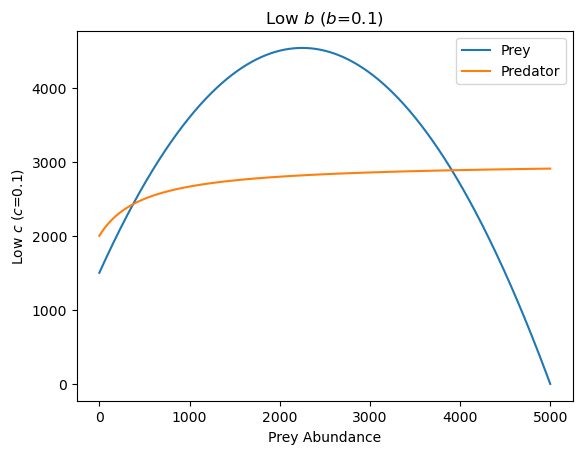

In [175]:
plt.plot(sp1_nullcline1)
plt.plot(sp2_nullcline1)
plt.title("Low $b$ ($b$=0.1)")
plt.ylabel("Low $c$ ($c$=0.1)")
plt.xlabel("Prey Abundance")
plt.legend(['Prey','Predator'])

### Plot 2

In [176]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline2 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline2 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 3

In [177]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline3 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline3 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 4

In [178]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline4 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline4 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 5

In [179]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline5 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline5 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 6

In [180]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline6 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline6 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 7 

In [181]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline7 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline7 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 8 

In [182]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline8 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline8 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 9

In [183]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline9 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline9 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

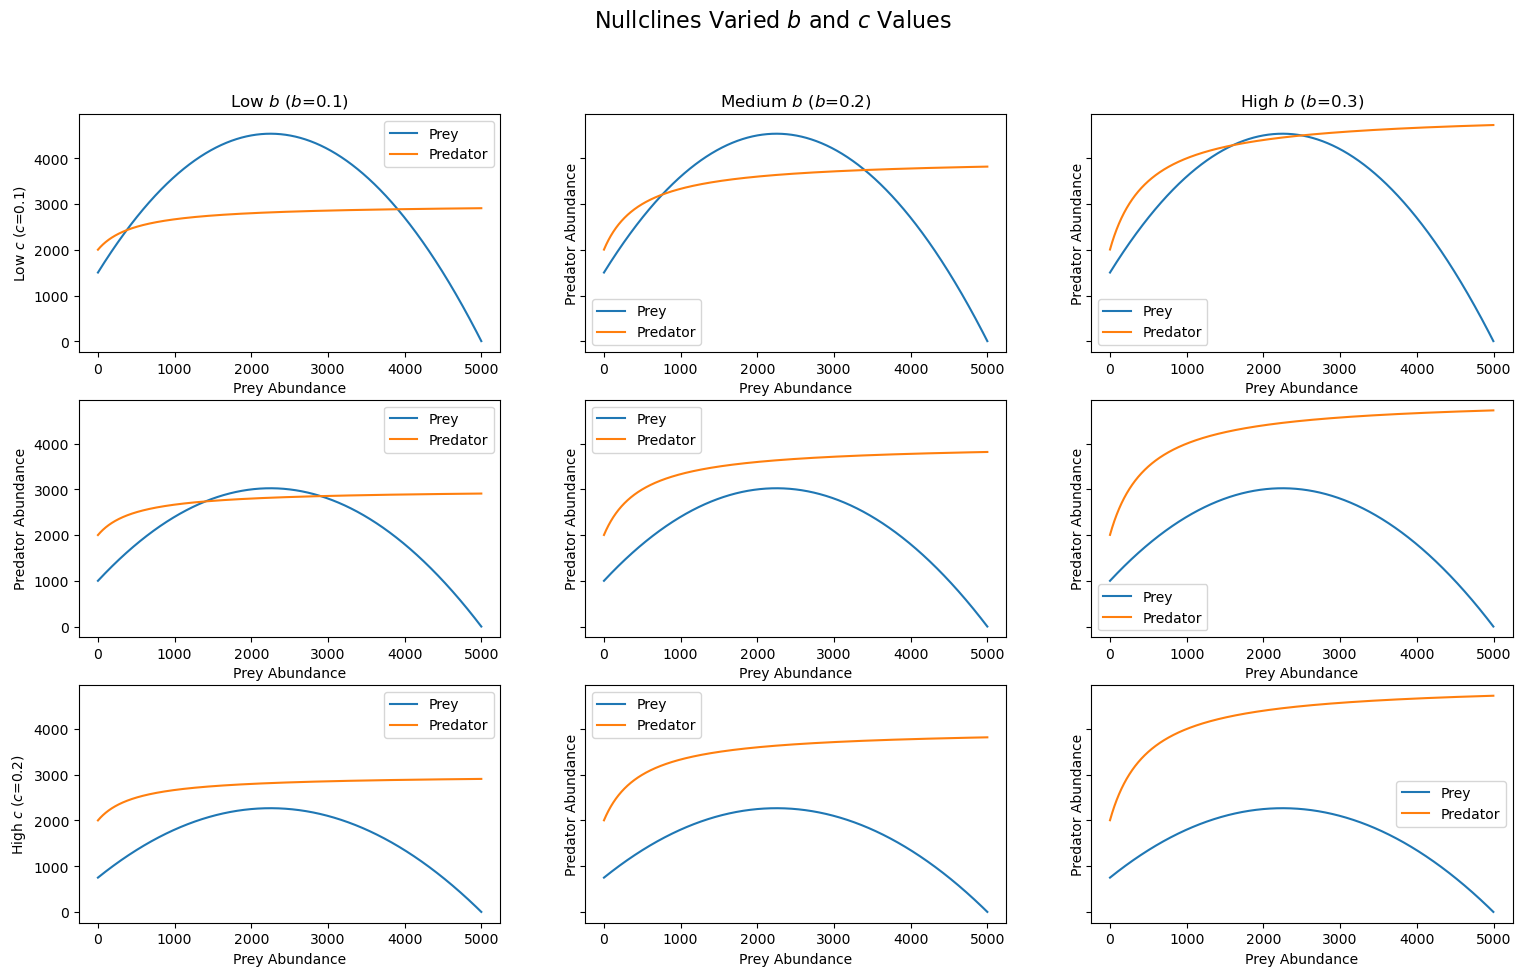

In [184]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharey= True)
ax1.plot(sp1_nullcline1)
ax1.plot(sp2_nullcline1)
ax1.set_title("Low $b$ ($b$=0.1)")
ax1.set_ylabel("Low $c$ ($c$=0.1)")
ax1.set_xlabel("Prey Abundance")
ax1.legend(['Prey','Predator'])

ax2.plot(sp1_nullcline2)
ax2.plot(sp2_nullcline2)
ax2.set_title("Medium $b$ ($b$=0.2)")
ax2.set_xlabel("Prey Abundance")
ax2.set_ylabel("Predator Abundance")
ax2.legend(['Prey','Predator'])

ax3.plot(sp1_nullcline3)
ax3.plot(sp2_nullcline3)
ax3.set_title("High $b$ ($b$=0.3)")
ax3.set_xlabel("Prey Abundance")
ax3.set_ylabel("Predator Abundance")
ax3.legend(['Prey','Predator'])

ax4.plot(sp1_nullcline4)
ax4.plot(sp2_nullcline4)
ax4.set_ylabel("Medium $c$ ($c$=0.15)")
ax4.set_xlabel("Prey Abundance")
ax4.set_ylabel("Predator Abundance")
ax4.legend(['Prey','Predator'])

ax5.plot(sp1_nullcline5)
ax5.plot(sp2_nullcline5)
ax5.set_xlabel("Prey Abundance")
ax5.set_ylabel("Predator Abundance")
ax5.legend(['Prey','Predator'])

ax6.plot(sp1_nullcline6)
ax6.plot(sp2_nullcline6)
ax6.set_xlabel("Prey Abundance")
ax6.set_ylabel("Predator Abundance")
ax6.legend(['Prey','Predator'])

ax7.plot(sp1_nullcline7)
ax7.plot(sp2_nullcline7)
ax7.set_xlabel("Prey Abundance")
ax7.set_ylabel("High $c$ ($c$=0.2)")
ax7.legend(['Prey','Predator'])

ax8.plot(sp1_nullcline8)
ax8.plot(sp2_nullcline8)
ax8.set_xlabel("Prey Abundance")
ax8.set_ylabel("Predator Abundance")
ax8.legend(['Prey','Predator'])

ax9.plot(sp1_nullcline9)
ax9.plot(sp2_nullcline9)
ax9.set_xlabel("Prey Abundance")
ax9.set_ylabel("Predator Abundance")
ax9.legend(['Prey','Predator'])

fig.suptitle('Nullclines Varied $b$ and $c$ Values', fontsize=16)
fig.set_size_inches(18.5, 10.5)
plt.savefig("ICRS_figures/Nullclines_3x3_fish.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

## c & b ranges

In [660]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 0 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array1, P_array1, H_harvest_array1, P_harvest_array1 = run_model(H0, P0, parameters_dict)

In [736]:
size = 100
c_array = np.linspace(0.001,0.3,size)
H_final_array1 = np.zeros(size)
P_final_array1 = np.zeros(size)
H_harvest_final_array1 = np.zeros(size)
P_harvest_final_array1 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100
    
for i,c in enumerate(c_array):
    parameters_dict['c'] = c
    H_array1, P_array1, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array1[i] = np.mean(H_array1[-200:-1])
    P_final_array1[i] = np.mean(P_array1[-200:-1])
    H_harvest_final_array1[i] = np.mean(H_harvest_array[-200:-1])
    P_harvest_final_array1[i] = np.mean(P_harvest_array[-200:-1])

In [737]:
size = 100
b_array = np.linspace(0.001,0.3,size)
H_final_array1 = np.zeros(size)
P_final_array1 = np.zeros(size)
H_harvest_final_array1 = np.zeros(size)
P_harvest_final_array1 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,b in enumerate(b_array):
    parameters_dict['b'] = b
    H_array1, P_array1, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array1[i] = np.mean(H_array1[-200:-1])
    P_final_array1[i] = np.mean(P_array1[-200:-1])
    H_harvest_final_array1[i] = np.mean(H_harvest_array[-200:-1])
    P_harvest_final_array1[i] = np.mean(P_harvest_array[-200:-1])

In [738]:
#list elements 
r_H_c = (r_H/c_array)
r_P_b = (r_P/b_array)
abundance_total = H_final_array1 + P_final_array1

#merge lists
list_of_values = list(zip(r_H_c, r_P_b))

#create data frame of lists
df = pd.DataFrame(list_of_values,
                  columns=['r_H_c', 'r_P_b'])

df['Abundance'] = abundance_total

df

r_H_c       r_P_b    Abundance
0   400.000000  200.000000  4645.656728
1    99.497487   49.748744  4588.707495
2    56.814921   28.407461  4510.688102
3    39.759036   19.879518  4386.053659
4    30.579151   15.289575  4151.762469
..         ...         ...          ...
95    1.389279    0.694639  2482.765674
96    1.374857    0.687428  2480.146642
97    1.360731    0.680366  2477.568596
98    1.346893    0.673446  2475.030462
99    1.333333    0.666667  2472.531344

[100 rows x 3 columns]

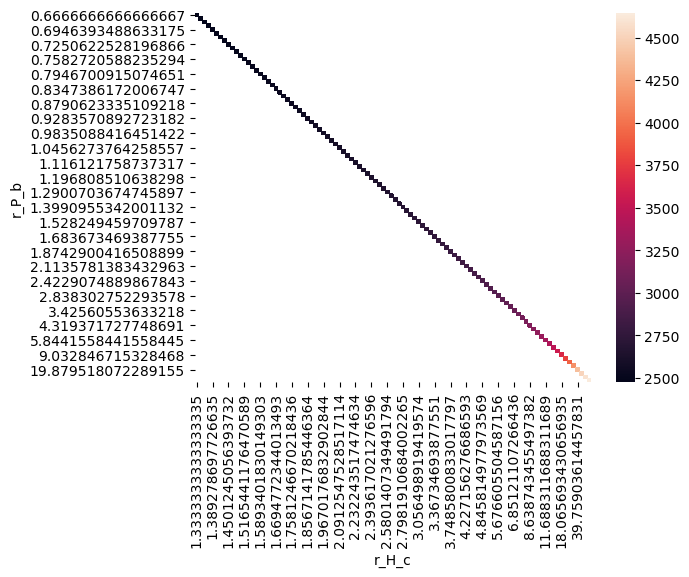

In [739]:
df = df.pivot("r_P_b", "r_H_c", "Abundance")
df
ax = sns.heatmap(df)

In [740]:
df

r_H_c        1.333333     1.346893     1.360731     1.374857     1.389279    \
r_P_b                                                                         
0.666667    2472.531344          NaN          NaN          NaN          NaN   
0.673446            NaN  2475.030462          NaN          NaN          NaN   
0.680366            NaN          NaN  2477.568596          NaN          NaN   
0.687428            NaN          NaN          NaN  2480.146642          NaN   
0.694639            NaN          NaN          NaN          NaN  2482.765674   
...                 ...          ...          ...          ...          ...   
15.289575           NaN          NaN          NaN          NaN          NaN   
19.879518           NaN          NaN          NaN          NaN          NaN   
28.407461           NaN          NaN          NaN          NaN          NaN   
49.748744           NaN          NaN          NaN          NaN          NaN   
200.000000          NaN          NaN          NaN          NaN          NaN   

r_H_c       1.404006    1.419050    1.434419    1.450125    1.466178    ...  \
r_P_b                                                                   ...   
0.666667           NaN         NaN         NaN         NaN         NaN  ...   
0.673446           NaN         NaN         NaN         NaN         NaN  ...   
0.680366           NaN         NaN         NaN         NaN         NaN  ...   
0.687428           NaN         NaN         NaN         NaN         NaN  ...   
0.694639           NaN         NaN         NaN         NaN         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
15.289575          NaN         NaN         NaN         NaN         NaN  ...   
19.879518          NaN         NaN         NaN         NaN         NaN  ...   
28.407461          NaN         NaN         NaN         NaN         NaN  ...   
49.748744          NaN         NaN         NaN         NaN         NaN  ...   
200.000000         NaN         NaN         NaN         NaN         NaN  ...   

r_H_c       14.193548   15.897230   18.065693   20.919176   24.843162   \
r_P_b                                                                    
0.666667           NaN         NaN         NaN         NaN         NaN   
0.673446           NaN         NaN         NaN         NaN         NaN   
0.680366           NaN         NaN         NaN         NaN         NaN   
0.687428           NaN         NaN         NaN         NaN         NaN   
0.694639           NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
15.289575          NaN         NaN         NaN         NaN         NaN   
19.879518          NaN         NaN         NaN         NaN         NaN   
28.407461          NaN         NaN         NaN         NaN         NaN   
49.748744          NaN         NaN         NaN         NaN         NaN   
200.000000         NaN         NaN         NaN         NaN         NaN   

r_H_c        30.579151    39.759036    56.814921    99.497487    400.000000  
r_P_b                                                                        
0.666667            NaN          NaN          NaN          NaN          NaN  
0.673446            NaN          NaN          NaN          NaN          NaN  
0.680366            NaN          NaN          NaN          NaN          NaN  
0.687428            NaN          NaN          NaN          NaN          NaN  
0.694639            NaN          NaN          NaN          NaN          NaN  
...                 ...          ...          ...          ...          ...  
15.289575   4151.762469          NaN          NaN          NaN          NaN  
19.879518           NaN  4386.053659          NaN          NaN          NaN  
28.407461           NaN          NaN  4510.688102          NaN          NaN  
49.748744           NaN          NaN          NaN  4588.707495          NaN  
200.000000          NaN          NaN         

In [728]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
flights

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237   271   305   310   362   
December    118   140   166   194   201   229   278   306   336   337   405   

year       1960  
month            
January     417  
February    391  
March       419  
April       461  
May         472  
June        535  
July        622  
August      606  
September   508  
October     461  
November    390  
December    432

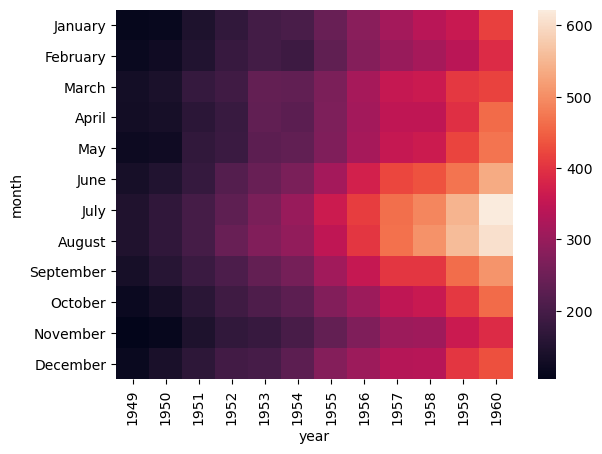

In [725]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

In [724]:
df = df.unstack(level=-1)

df

0            1            2            3            4   \
r_H_c       400.000000    99.497487    56.814921    39.759036    30.579151   
r_P_b       200.000000    49.748744    28.407461    19.879518    15.289575   
Abundance  4645.656728  4588.707495  4510.688102  4386.053659  4151.762469   

                    5            6            7            8            9   \
r_H_c        24.843162    20.919176    18.065693    15.897230    14.193548   
r_P_b        12.421581    10.459588     9.032847     7.948615     7.096774   
Abundance  3937.235326  3780.331942  3659.113176  3561.606563  3480.797754   

           ...           90           91           92           93  \
r_H_c      ...     1.466178     1.450125     1.434419     1.419050   
r_P_b      ...     0.733089     0.725062     0.717209     0.709525   
Abundance  ...  2496.514581  2493.674164  2490.880064  2488.131289   

                    94           95           96           97           98  \
r_H_c         1.404006     1.389279     1.374857     1.360731     1.346893   
r_P_b         0.702003     0.694639     0.687428     0.680366     0.673446   
Abundance  2485.426846  2482.765674  2480.146642  2477.568596  2475.030462   

                    99  
r_H_c         1.333333  
r_P_b         0.666667  
Abundance  2472.531344  

[3 rows x 100 columns]

TypeError: Invalid shape (300,) for image data

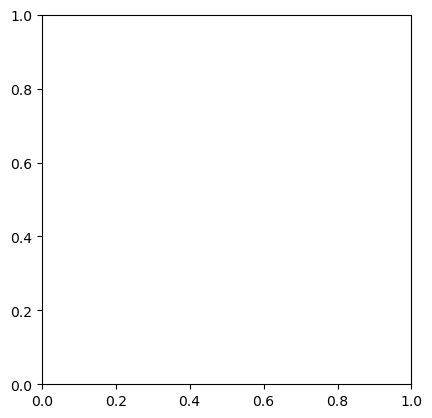

In [696]:
plt.imshow(df, cmap ="RdYlBu")
plt.colorbar()

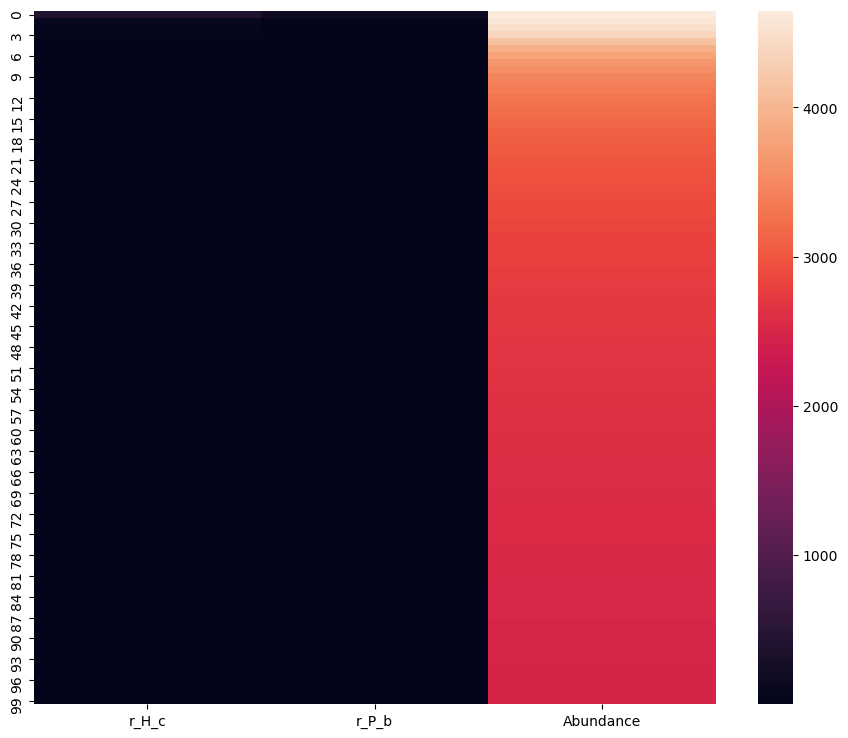

In [692]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df)
plt.show()

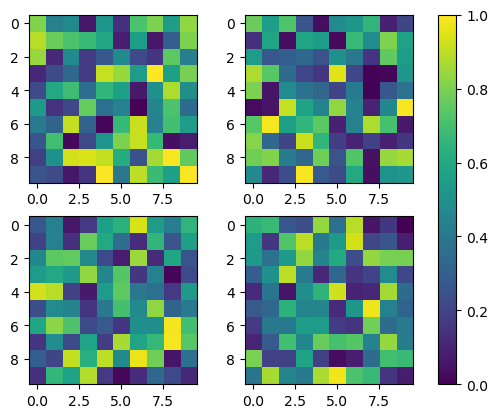

In [664]:
fig, axes = plt.subplots(nrows=2, ncols=2)
  
for ax in axes.flat:
    im = ax.imshow(np.random.random((10, 10)), vmin=0, vmax=1)
  
plt.colorbar(im, ax=axes.ravel().tolist())
  
plt.show()

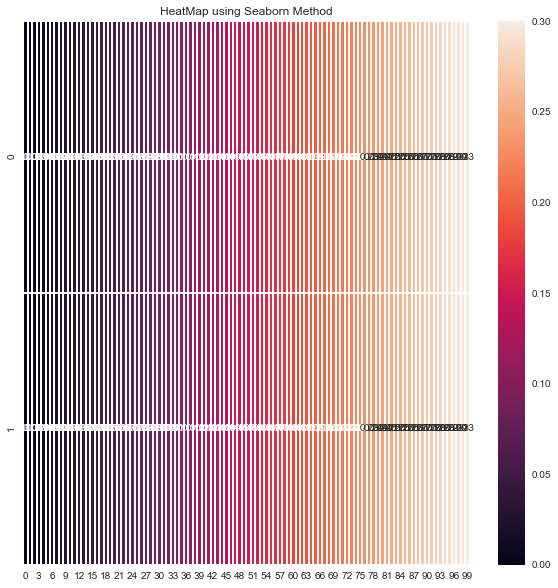

In [548]:
# 1. Import Modules
plt.style.use("seaborn")
 
# 2. Generate a 10x10 random integer matrix
data = (c_array, b_array)
 
# 3. Plot the heatmap
plt.figure(figsize=(10,10))
heat_map = sns.heatmap( data, linewidth = 1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()

In [ ]:
size = 100
b_array = np.linspace(0.001,0.3,size)
c_array = np.linspace(0.001,0.3,size)
H_final_array1 = np.zeros(size)
P_final_array1 = np.zeros(size)
H_harvest_final_array1 = np.zeros(size)
P_harvest_final_array1 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,b in enumerate(b_array):
    parameters_dict['b'] = b
    H_array1, P_array1, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array1[i] = np.mean(H_array1[-200:-1])
    P_final_array1[i] = np.mean(P_array1[-200:-1])
    H_harvest_final_array1[i] = np.mean(H_harvest_array[-200:-1])
    P_harvest_final_array1[i] = np.mean(P_harvest_array[-200:-1])
    
for i,c in enumerate(c_array):
    parameters_dict['c'] = c
    H_array1, P_array1, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
    H_final_array1[i] = np.mean(H_array1[-200:-1])
    P_final_array1[i] = np.mean(P_array1[-200:-1])
    H_harvest_final_array1[i] = np.mean(H_harvest_array[-200:-1])
    P_harvest_final_array1[i] = np.mean(P_harvest_array[-200:-1])

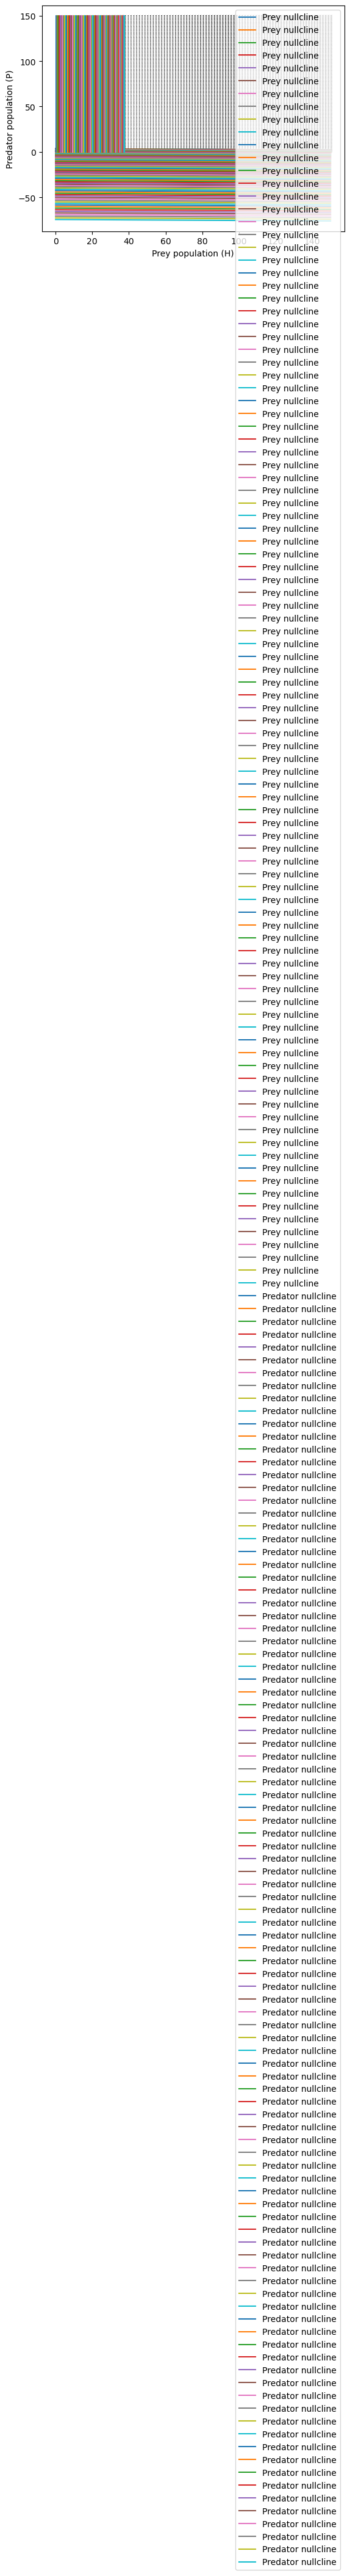

In [151]:
# Define the system of equations
def prey_predator_system(state, t):
    H, P = state
    r_H = 0.4 # growth rate of herbivores
    K_H = 5000 # carrying capacity of herbivores
    theta_H = 50 # immigration of herbivores
    c = 0.1 #additional mortality of H 
    d = 500 # value of H when predation half its max value 
    q_H = 1. # proportionality constant for herbivore harvest 
    E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
    #Predator parameters:
    r_P = 0.2 # growth rate of predator 
    K_P = 2000 # carrying capactiy of predators
    b = 0.1 # additional growth of P due to H
    theta_P = 0 # immigration of predators 
    q_P = 1. # proportionality constant for predator harvest 
    E_P = 0.0 # Effort for predator harvest
    dH = r_H*H*(1-H/K_H) - (c*H*P)/(d+H) + theta_H - q_H*E_H*H
    dP = r_P*P*(1-P/K_P) + (b*H*P)/(d+H) + theta_P - q_P*E_P*P
    return [dH, dP]

# Define the nullclines
def prey_nullcline(H):
    r_H = 0.5
    K_H = 100
    c = 0.01
    d = 0.1
    theta_H = 0.5
    q_H = 0.5
    E_H = 0.5
    return r_H*H*(1-H/K_H) - (c*H*P)/(d+H) + theta_H - q_H*E_H*H

def predator_nullcline(P):
    r_P = 0.2
    K_P = 200
    b = 0.3
    d = 0.1
    theta_P = 0.2
    q_P = 0.2
    E_P = 0.5
    return r_P*P*(1-P/K_P) + (b*H*P)/(d+H) + theta_P - q_P*E_P*P

# Define the range of values for H and P
H_range = np.linspace(0, 150, 100)
P_range = np.linspace(0, 150, 100)

# Create a meshgrid of H and P values
H, P = np.meshgrid(H_range, P_range)

# Evaluate the derivatives at each point in the meshgrid
dH, dP = prey_predator_system([H, P], 0)

# Plot the nullclines
plt.plot(H_range, prey_nullcline(H_range), label='Prey nullcline')
plt.plot(predator_nullcline(P_range), P_range, label='Predator nullcline')

# Plot the vector field
plt.quiver(H, P, dH, dP)

# Add labels and legend
plt.xlabel('Prey population (H)')
plt.ylabel('Predator population (P)')
plt.legend()

# Show the plot
plt.show()

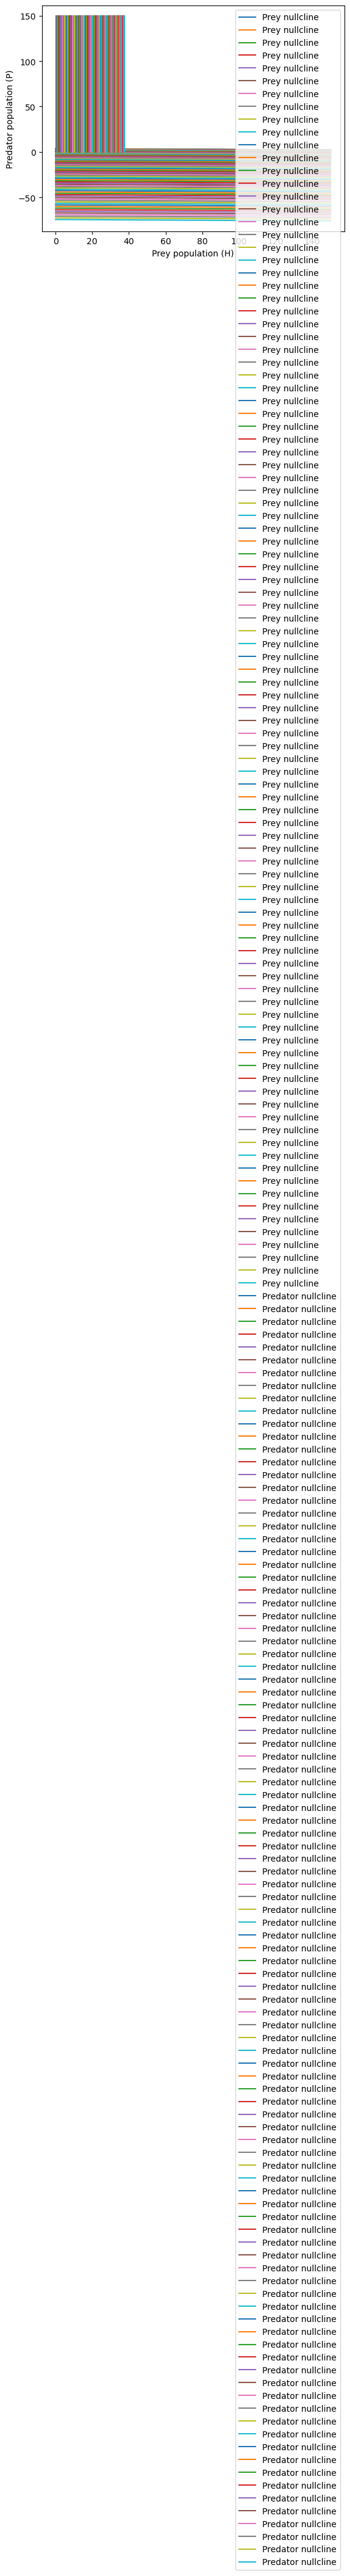

In [152]:
# Define the nullclines
def prey_nullcline(H):
    r_H = 0.5
    K_H = 100
    c = 0.01
    d = 0.1
    theta_H = 0.5
    q_H = 0.5
    E_H = 0.5
    return r_H*H*(1-H/K_H) - (c*H*P)/(d+H) + theta_H - q_H*E_H*H

def predator_nullcline(P):
    r_P = 0.2
    K_P = 200
    b = 0.3
    d = 0.1
    theta_P = 0.2
    q_P = 0.2
    E_P = 0.5
    return r_P*P*(1-P/K_P) + (b*H*P)/(d+H) + theta_P - q_P*E_P*P

# Define the range of values for H and P
H_range = np.linspace(0, 150, 100)
P_range = np.linspace(0, 150, 100)

# Plot the nullclines
plt.plot(H_range, prey_nullcline(H_range), label='Prey nullcline')
plt.plot(predator_nullcline(P_range), P_range, label='Predator nullcline')

# Add labels and legend
plt.xlabel('Prey population (H)')
plt.ylabel('Predator population (P)')
plt.legend()

# Show the plot
plt.show()